In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns

### Function to Read and Load .cfile Data

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

### Calculate IQ Magnitude

In [3]:
def calculate_IQMagnitude(complex_data):
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    magnitude = np.sqrt(I**2 + Q**2)
    
    return magnitude

### Calculate IQ Angle

In [4]:
def calculate_IQ_Angle(complex_data):
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    angle = np.arctan(Q/I)
    return angle
    

### Calculate RSSI

In [5]:
def calculate_rssi(complex_data):
    """
    Calculate RSSI as 10 * log10(I[k]^2 + Q[k]^2) for each sample.
    """
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    rssi = 10 * np.log10(I**2 + Q**2)
    
    return rssi

### Trunacate Vectors

In [6]:
def truncate_vectors_to_same_size(*vectors):
    # Find the minimum length among all vectors
    min_length = min(len(vec) for vec in vectors)
    # Truncate all vectors to the same length
    return [vec[:min_length] for vec in vectors]

### Sanitize Vectors

In [7]:
def sanitize_vector(vector):
    # Replace NaN or Inf values with zeros or a suitable value
    vector = np.nan_to_num(vector, nan=0.0, posinf=0.0, neginf=0.0)
    return vector

### Reading Data

In [6]:
dataWithOutInterference = getData("./nothing.cfile")

In [7]:
dataWithOutInterference2 = getData("./nothing2.cfile")

In [3]:
dataWithInterferenceLOSCenter = getData("./centerSecond.cfile")
dataWithInterferenceLOSFirstQuartile = getData("./centerFirst.cfile")
dataWithInterferenceLOSThirdQuartile = getData("./centerThird.cfile")

In [9]:
dataWithInterferenceLOSCenter2 = getData("./centerSecond2.cfile")
dataWithInterferenceLOSFirstQuartile2 = getData("./centerFirst2.cfile")
dataWithInterferenceLOSThirdQuartile2 = getData("./centerThird2.cfile")

In [10]:
dataWithInterferenceLOSCenter4 = getData("./centerSecond3.cfile")
dataWithInterferenceLOSFirstQuartile4 = getData("./centerFirst3.cfile")
dataWithInterferenceLOSThirdQuartile4 = getData("./centerThird3.cfile")

In [4]:
dataWithInterferenceNLOSLeftCenter = getData("./leftSecond.cfile")
dataWithInterferenceNLOSLeftFirstQuartile = getData("./leftFirst.cfile")
dataWithInterferenceNLOSLeftThirdQuartile = getData("./leftThird.cfile")

In [12]:
dataWithInterferenceNLOSLeftCenter2 = getData("./leftSecond2.cfile")
dataWithInterferenceNLOSLeftFirstQuartile2 = getData("./leftFirst2.cfile")
dataWithInterferenceNLOSLeftThirdQuartile2 = getData("./leftThird2.cfile")

In [13]:
dataWithInterferenceNLOSLeftCenter4 = getData("./leftSecond3.cfile")
dataWithInterferenceNLOSLeftFirstQuartile4 = getData("./leftFirst3.cfile")
dataWithInterferenceNLOSLeftThirdQuartile4 = getData("./leftThird3.cfile")

In [5]:
dataWithInterferenceNLOSRightCenter = getData("./rightSecond.cfile")
dataWithInterferenceNLOSRightFirstQuartile = getData("./rightFirst.cfile")
dataWithInterferenceNLOSRightThirdQuartile = getData("./rightThird.cfile")

In [15]:
dataWithInterferenceNLOSRightCenter2 = getData("./rightSecond2.cfile")
dataWithInterferenceNLOSRightFirstQuartile2 = getData("./rightFirst2.cfile")
dataWithInterferenceNLOSRightThirdQuartile2 = getData("./rightThird2.cfile")

MemoryError: Unable to allocate 2.06 GiB for an array with shape (276828146,) and data type complex64

In [16]:
dataWithInterferenceNLOSRightCenter4 = getData("./rightSecond3.cfile")
dataWithInterferenceNLOSRightFirstQuartile4 = getData("./rightFirst3.cfile")
dataWithInterferenceNLOSRightThirdQuartile4 = getData("./rightThird3.cfile")

MemoryError: Unable to allocate 792. MiB for an array with shape (103862121,) and data type complex64

### Remove No Obstruction

In [ ]:
dataWithInterferenceLOSCenterCleaned = dataWithInterferenceLOSCenter - dataWithOutInterference
dataWithInterferenceLOSFirstQuartileCleaned = dataWithInterferenceLOSFirstQuartile - dataWithOutInterference
dataWithInterferenceLOSThirdQuartileCleaned = dataWithInterferenceLOSThirdQuartile - dataWithOutInterference

In [ ]:
dataWithInterferenceLOSCenterCleaned2 = dataWithInterferenceLOSCenter2 - dataWithOutInterference
dataWithInterferenceLOSFirstQuartileCleaned2 = dataWithInterferenceLOSFirstQuartile2 - dataWithOutInterference
dataWithInterferenceLOSThirdQuartileCleaned2 = dataWithInterferenceLOSThirdQuartile2 - dataWithOutInterference

In [ ]:
dataWithInterferenceLOSCenterCleaned4 = dataWithInterferenceLOSCenter4 - dataWithOutInterference
dataWithInterferenceLOSFirstQuartileCleaned4 = dataWithInterferenceLOSFirstQuartile4 - dataWithOutInterference
dataWithInterferenceLOSThirdQuartileCleaned4 = dataWithInterferenceLOSThirdQuartile4 - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSLeftCenterCleaned = dataWithInterferenceNLOSLeftCenter - dataWithOutInterference
dataWithInterferenceNLOSLeftFirstQuartileCleaned = dataWithInterferenceNLOSLeftFirstQuartile - dataWithOutInterference
dataWithInterferenceNLOSLeftThirdQuartileCleaned = dataWithInterferenceNLOSLeftThirdQuartile - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSLeftCenterCleaned2 = dataWithInterferenceNLOSLeftCenter2 - dataWithOutInterference
dataWithInterferenceNLOSLeftFirstQuartileCleaned2 = dataWithInterferenceNLOSLeftFirstQuartile2 - dataWithOutInterference
dataWithInterferenceNLOSLeftThirdQuartileCleaned2 = dataWithInterferenceNLOSLeftThirdQuartile2 - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSLeftCenterCleaned4 = dataWithInterferenceNLOSLeftCenter4 - dataWithOutInterference
dataWithInterferenceNLOSLeftFirstQuartileCleaned4 = dataWithInterferenceNLOSLeftFirstQuartile4 - dataWithOutInterference
dataWithInterferenceNLOSLeftThirdQuartileCleaned4 = dataWithInterferenceNLOSLeftThirdQuartile4 - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSRightCenterCleaned = dataWithInterferenceNLOSRightCenter - dataWithOutInterference
dataWithInterferenceNLOSRightFirstQuartileCleaned = dataWithInterferenceNLOSRightFirstQuartile - dataWithOutInterference
dataWithInterferenceNLOSRightThirdQuartileCleaned = dataWithInterferenceNLOSRightThirdQuartile - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSRightCenterCleaned2 = dataWithInterferenceNLOSRightCenter2 - dataWithOutInterference
dataWithInterferenceNLOSRightFirstQuartileCleaned2 = dataWithInterferenceNLOSRightFirstQuartile2 - dataWithOutInterference
dataWithInterferenceNLOSRightThirdQuartileCleaned2 = dataWithInterferenceNLOSRightThirdQuartile2 - dataWithOutInterference

In [ ]:
dataWithInterferenceNLOSRightCenterCleaned4 = dataWithInterferenceNLOSRightCenter4 - dataWithOutInterference
dataWithInterferenceNLOSRightFirstQuartileCleaned4 = dataWithInterferenceNLOSRightFirstQuartile4 - dataWithOutInterference
dataWithInterferenceNLOSRightThirdQuartileCleaned4 = dataWithInterferenceNLOSRightThirdQuartile4 - dataWithOutInterference

### Cleaning

#### Removing DC Offset

In [ ]:
dataWithOutInterferenceDC = dataWithOutInterference - np.mean(dataWithOutInterference)
dataWithOutInterference2DC = dataWithOutInterference2 - np.mean(dataWithOutInterference2)

In [ ]:
dataWithInterferenceLOSCenterDC = dataWithInterferenceLOSCenter - np.mean(dataWithInterferenceLOSCenter)
dataWithInterferenceLOSFirstQuartileDC = dataWithInterferenceLOSFirstQuartile - np.mean(dataWithInterferenceLOSFirstQuartile)
dataWithInterferenceLOSThirdQuartileDC = dataWithInterferenceLOSThirdQuartile - np.mean(dataWithInterferenceLOSThirdQuartile)

dataWithInterferenceNLOSLeftCenterDC = dataWithInterferenceNLOSLeftCenter - np.mean(dataWithInterferenceNLOSLeftCenter)
dataWithInterferenceNLOSLeftFirstQuartileDC = dataWithInterferenceNLOSLeftFirstQuartile - np.mean(dataWithInterferenceNLOSLeftFirstQuartile)
dataWithInterferenceNLOSLeftThirdQuartileDC = dataWithInterferenceNLOSLeftThirdQuartile - np.mean(dataWithInterferenceNLOSLeftThirdQuartile)

dataWithInterferenceNLOSRightCenterDC = dataWithInterferenceNLOSRightCenter - np.mean(dataWithInterferenceNLOSRightCenter)
dataWithInterferenceNLOSRightFirstQuartileDC = dataWithInterferenceNLOSRightFirstQuartile - np.mean(dataWithInterferenceNLOSRightFirstQuartile)
dataWithInterferenceNLOSRightThirdQuartileDC = dataWithInterferenceNLOSRightThirdQuartile - np.mean(dataWithInterferenceNLOSRightThirdQuartile)

In [ ]:
dataWithInterferenceLOSCenter2DC = dataWithInterferenceLOSCenter2 - np.mean(dataWithInterferenceLOSCenter2)
dataWithInterferenceLOSFirstQuartile2DC = dataWithInterferenceLOSFirstQuartile2 - np.mean(dataWithInterferenceLOSFirstQuartile2)
dataWithInterferenceLOSThirdQuartile2DC = dataWithInterferenceLOSThirdQuartile2 - np.mean(dataWithInterferenceLOSThirdQuartile2)

dataWithInterferenceNLOSLeftCenter2DC = dataWithInterferenceNLOSLeftCenter2 - np.mean(dataWithInterferenceNLOSLeftCenter2)
dataWithInterferenceNLOSLeftFirstQuartile2DC = dataWithInterferenceNLOSLeftFirstQuartile2 - np.mean(dataWithInterferenceNLOSLeftFirstQuartile2)
dataWithInterferenceNLOSLeftThirdQuartile2DC = dataWithInterferenceNLOSLeftThirdQuartile2 - np.mean(dataWithInterferenceNLOSLeftThirdQuartile2)

dataWithInterferenceNLOSRightCenter2DC = dataWithInterferenceNLOSRightCenter2 - np.mean(dataWithInterferenceNLOSRightCenter2)
dataWithInterferenceNLOSRightFirstQuartile2DC = dataWithInterferenceNLOSRightFirstQuartile2 - np.mean(dataWithInterferenceNLOSRightFirstQuartile2)
dataWithInterferenceNLOSRightThirdQuartile2DC = dataWithInterferenceNLOSRightThirdQuartile2 - np.mean(dataWithInterferenceNLOSRightThirdQuartile2)

In [ ]:

dataWithInterferenceLOSCenter4DC = dataWithInterferenceLOSCenter4 - np.mean(dataWithInterferenceLOSCenter4)
dataWithInterferenceLOSFirstQuartile4DC = dataWithInterferenceLOSFirstQuartile4 - np.mean(dataWithInterferenceLOSFirstQuartile4)
dataWithInterferenceLOSThirdQuartile4DC = dataWithInterferenceLOSThirdQuartile4 - np.mean(dataWithInterferenceLOSThirdQuartile4)

dataWithInterferenceNLOSLeftCenter4DC = dataWithInterferenceNLOSLeftCenter4 - np.mean(dataWithInterferenceNLOSLeftCenter4)
dataWithInterferenceNLOSLeftFirstQuartile4DC = dataWithInterferenceNLOSLeftFirstQuartile4 - np.mean(dataWithInterferenceNLOSLeftFirstQuartile4)
dataWithInterferenceNLOSLeftThirdQuartile4DC = dataWithInterferenceNLOSLeftThirdQuartile4 - np.mean(dataWithInterferenceNLOSLeftThirdQuartile4)

dataWithInterferenceNLOSRightCenter4DC = dataWithInterferenceNLOSRightCenter4 - np.mean(dataWithInterferenceNLOSRightCenter4)
dataWithInterferenceNLOSRightFirstQuartile4DC = dataWithInterferenceNLOSRightFirstQuartile4 - np.mean(dataWithInterferenceNLOSRightFirstQuartile4)
dataWithInterferenceNLOSRightThirdQuartile4DC = dataWithInterferenceNLOSRightThirdQuartile4 - np.mean(dataWithInterferenceNLOSRightThirdQuartile4)

#### Creating Equal Size Vectors

In [ ]:
Vectors_Raw1 = [
    calculate_IQMagnitude(dataWithOutInterference),
    calculate_IQMagnitude(dataWithOutInterference2), 
    
    calculate_IQMagnitude(dataWithInterferenceLOSCenter),
    calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile), 
    calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile), 

    calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter), 
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile), 
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile), 

    calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter), 
    calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile), 
    calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile), 
]

In [ ]:
Vectors_Raw2 = [
    calculate_IQMagnitude(dataWithInterferenceLOSCenter2),
    calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile2), 
    calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile2), 

    calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter2), 
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile2), 
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile2), 

    calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter2), 
    calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile2), 
    calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile2), 
]

In [ ]:
Vectors_Raw4 = [
    calculate_IQMagnitude(dataWithInterferenceLOSCenter4),
    calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile4), 
    calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile4), 

    calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter4), 
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile4), 
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile4), 

    calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter4), 
    calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile4), 
    calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile4), 
]

In [ ]:
Vectors_Raw = (Vectors_Raw1 + Vectors_Raw2 +  Vectors_Raw4)

In [ ]:
for i, vec in enumerate(Vectors_Raw):
    print(f"Vector {i}: Type: {type(vec)}, Length: {len(vec) if hasattr(vec, '__len__') else 'N/A'}")


In [ ]:
Vectors = truncate_vectors_to_same_size(*Vectors_Raw)

# Map back truncated vectors to their variables
(
    WithOutInterference,
    WithOutInterference2,

    NLOSLeftFirstQuartile,
    NLOSLeftCenter,
    NLOSLeftThirdQuartile,
    LOSFirstQuartile,
    LOSCenter,
    LOSThirdQuartile,
    NLOSRightFirstQuartile,
    NLOSRightCenter,
    NLOSRightThirdQuartile,

    LOSFirstQuartile2,
    LOSCenter2,

    NLOSLeftFirstQuartile2,
    NLOSLeftCenter2,
    NLOSLeftThirdQuartile2,
    LOSThirdQuartile2,
    NLOSRightFirstQuartile2,
    NLOSRightCenter2,
    NLOSRightThirdQuartile2,

    NLOSLeftFirstQuartile4,
    NLOSLeftCenter4,
    NLOSLeftThirdQuartile4,
    LOSFirstQuartile4,
    LOSCenter4,
    LOSThirdQuartile4,
    NLOSRightFirstQuartile4,
    NLOSRightCenter4,
    NLOSRightThirdQuartile4,
    
) = Vectors

#### Without Obstruction Removal

In [ ]:
WithOutInterference_Array = np.array([WithOutInterference, WithOutInterference2])
WithOutInterference_Mean_Array = np.mean(WithOutInterference_Array, axis=0)

In [ ]:
NLOSLeftFirstQuartile_Cleaned = NLOSLeftFirstQuartile - WithOutInterference_Mean_Array
NLOSLeftCenter_Cleaned = NLOSLeftCenter - WithOutInterference_Mean_Array
NLOSLeftThirdQuartile_Cleaned = NLOSLeftThirdQuartile - WithOutInterference_Mean_Array
LOSFirstQuartile_Cleaned = LOSFirstQuartile - WithOutInterference_Mean_Array
LOSCenter_Cleaned = LOSCenter - WithOutInterference_Mean_Array
LOSThirdQuartile_Cleaned = LOSThirdQuartile - WithOutInterference_Mean_Array
NLOSRightFirstQuartile_Cleaned = NLOSRightFirstQuartile - WithOutInterference_Mean_Array
NLOSRightCenter_Cleaned = NLOSRightCenter - WithOutInterference_Mean_Array
NLOSRightThirdQuartile_Cleaned  = NLOSRightThirdQuartile - WithOutInterference_Mean_Array

In [ ]:
LOSFirstQuartile2_Cleaned = LOSFirstQuartile2 - WithOutInterference_Mean_Array
LOSCenter2_Cleaned = LOSCenter2 - WithOutInterference_Mean_Array
NLOSLeftFirstQuartile2_Cleaned = NLOSLeftFirstQuartile2 - WithOutInterference_Mean_Array
NLOSLeftCenter2_Cleaned = NLOSLeftCenter2 - WithOutInterference_Mean_Array
NLOSLeftThirdQuartile2_Cleaned = NLOSLeftThirdQuartile2 - WithOutInterference_Mean_Array
LOSThirdQuartile2_Cleaned = LOSThirdQuartile2 - WithOutInterference_Mean_Array
NLOSRightFirstQuartile2_Cleaned = NLOSRightFirstQuartile2 - WithOutInterference_Mean_Array
NLOSRightCenter2_Cleaned = NLOSRightCenter2 - WithOutInterference_Mean_Array
NLOSRightThirdQuartile2_Cleaned = NLOSRightThirdQuartile2 - WithOutInterference_Mean_Array

In [ ]:
NLOSLeftFirstQuartile4_Cleaned = NLOSLeftFirstQuartile4 - WithOutInterference_Mean_Array
NLOSLeftCenter4_Cleaned = NLOSLeftCenter4 - WithOutInterference_Mean_Array
NLOSLeftThirdQuartile4_Cleaned = NLOSLeftThirdQuartile4 - WithOutInterference_Mean_Array
LOSFirstQuartile4_Cleaned = LOSFirstQuartile4 - WithOutInterference_Mean_Array
LOSCenter4_Cleaned = LOSCenter4 - WithOutInterference_Mean_Array
LOSThirdQuartile4_Cleaned = LOSThirdQuartile4 - WithOutInterference_Mean_Array
NLOSRightFirstQuartile4_Cleaned = NLOSRightFirstQuartile4 - WithOutInterference_Mean_Array
NLOSRightCenter4_Cleaned = NLOSRightCenter4 - WithOutInterference_Mean_Array
NLOSRightThirdQuartile4_Cleaned = NLOSRightThirdQuartile4 - WithOutInterference_Mean_Array

#### Mean of Vectors

In [ ]:
NLOSLeftFirstQuartile_Cleaned_Array = np.array([NLOSLeftFirstQuartile_Cleaned, NLOSLeftFirstQuartile2_Cleaned, NLOSLeftFirstQuartile4_Cleaned])
NLOSLeftFirstQuartile_Cleaned_Mean_Array = np.mean(NLOSLeftFirstQuartile_Cleaned_Array, axis=0)
NLOSLeftThirdQuartile_Cleaned_Array = np.array([NLOSLeftThirdQuartile_Cleaned, NLOSLeftThirdQuartile2_Cleaned, NLOSLeftThirdQuartile4_Cleaned])
NLOSLeftThirdQuartile_Cleaned_Mean_Array = np.mean(NLOSLeftThirdQuartile_Cleaned_Array, axis=0)
NLOSLeftCenter_Cleaned_Array = np.array([NLOSLeftCenter_Cleaned, NLOSLeftCenter2_Cleaned, NLOSLeftCenter4_Cleaned])
NLOSLeftCenter_Cleaned_Mean_Array = np.mean(NLOSLeftCenter_Cleaned_Array, axis=0)

In [ ]:
NLOSRightFirstQuartile_Cleaned_Array = np.array([NLOSRightFirstQuartile_Cleaned, NLOSRightFirstQuartile2_Cleaned, NLOSRightFirstQuartile4_Cleaned])
NLOSRightFirstQuartile_Cleaned_Mean_Array = np.mean(NLOSRightFirstQuartile_Cleaned_Array, axis=0)
NLOSRightThirdQuartile_Cleaned_Array = np.array([NLOSRightThirdQuartile_Cleaned, NLOSRightThirdQuartile2_Cleaned, NLOSRightThirdQuartile4_Cleaned])
NLOSRightThirdQuartile_Cleaned_Mean_Array = np.mean(NLOSRightThirdQuartile_Cleaned_Array, axis=0)
NLOSRightCenter_Cleaned_Array = np.array([NLOSRightCenter_Cleaned, NLOSRightCenter2_Cleaned, NLOSRightCenter4_Cleaned])
NLOSRightCenter_Cleaned_Mean_Array = np.mean(NLOSRightCenter_Cleaned_Array, axis=0)

In [ ]:
LOSFirstQuartile_Cleaned_Array = np.array([LOSFirstQuartile_Cleaned, LOSFirstQuartile2_Cleaned, LOSFirstQuartile4_Cleaned])
LOSFirstQuartile_Cleaned_Mean_Array = np.mean(LOSFirstQuartile_Cleaned_Array, axis=0)
LOSThirdQuartile_Cleaned_Array = np.array([LOSThirdQuartile_Cleaned, LOSThirdQuartile2_Cleaned, LOSThirdQuartile4_Cleaned])
LOSThirdQuartile_Cleaned_Mean_Array = np.mean(LOSThirdQuartile_Cleaned_Array, axis=0)
LOSCenter_Cleaned_Array = np.array([LOSCenter_Cleaned, LOSCenter2_Cleaned, LOSCenter4_Cleaned])
LOSCenter_Cleaned_Mean_Array = np.mean(LOSCenter_Cleaned_Array, axis=0)

### Statistical Vectors

In [ ]:
def calculate_StatVector(data_array):
    array_mean = np.mean(data_array)
    array_var = np.var(data_array)
    array_median = np.median(data_array)
    array_std_dev = np.std(data_array)
    array_min = np.min(data_array)
    array_max = np.max(data_array)

    result_array = np.array([
        array_mean,
        array_var,
        array_median,
        array_std_dev,
        array_min,
        array_max,
    ])
    
    return result_array

In [ ]:
LOSCenter_Mean_Vector = calculate_StatVector(LOSCenter_Cleaned_Mean_Array)

In [ ]:
LOSFirstQuartile_Mean_Vector = calculate_StatVector(LOSFirstQuartile_Cleaned_Mean_Array)

In [ ]:
LOSThirdQuartile_Mean_Vector = calculate_StatVector(LOSThirdQuartile_Cleaned_Mean_Array)

In [ ]:
NLOSLeftCenter_Mean_Vector = calculate_StatVector(NLOSLeftCenter_Cleaned_Mean_Array)

In [ ]:
NLOSLeftFirstQuartile_Mean_Vector = calculate_StatVector(NLOSLeftFirstQuartile_Cleaned_Mean_Array)

In [ ]:
NLOSLeftThirdQuartile_Mean_Vector = calculate_StatVector(NLOSLeftThirdQuartile_Cleaned_Mean_Array)

In [ ]:
NLOSRightCenter_Mean_Vector = calculate_StatVector(NLOSRightCenter_Cleaned_Mean_Array)

In [ ]:
NLOSRightFirstQuartile_Mean_Vector = calculate_StatVector(NLOSRightFirstQuartile_Cleaned_Mean_Array)

In [ ]:
NLOSRightThirdQuartile_Mean_Vector = calculate_StatVector(NLOSRightThirdQuartile_Cleaned_Mean_Array)

In [ ]:
LOSCenter2_Vector = calculate_StatVector(LOSCenter2_Cleaned)

In [ ]:
LOSFirstQuartile2_Vector = calculate_StatVector(LOSFirstQuartile2_Cleaned)

In [ ]:
LOSThirdQuartile2_Vector = calculate_StatVector(LOSThirdQuartile2_Cleaned)

In [ ]:
NLOSLeftCenter2_Vector = calculate_StatVector(NLOSLeftCenter2_Cleaned)

In [ ]:
NLOSLeftFirstQuartile2_Vector = calculate_StatVector(NLOSLeftFirstQuartile2_Cleaned)

In [ ]:
NLOSLeftThirdQuartile2_Vector = calculate_StatVector(NLOSLeftThirdQuartile2_Cleaned)

In [ ]:
NLOSRightCenter2_Vector = calculate_StatVector(NLOSRightCenter2_Cleaned)

In [ ]:
NLOSRightFirstQuartile2_Vector = calculate_StatVector(NLOSRightFirstQuartile2_Cleaned)

In [ ]:
NLOSRightThirdQuartile2_Vector = calculate_StatVector(NLOSRightThirdQuartile2_Cleaned)

#### HeatMap for Statistical Vector

In [ ]:
def plot_HeatMapVector(data_array):
    Result_Array = np.array([
        [
            distance.euclidean(NLOSLeftFirstQuartile_Mean_Vector, data_array),
            distance.euclidean(NLOSLeftCenter_Mean_Vector, data_array),
            distance.euclidean(NLOSLeftThirdQuartile_Mean_Vector, data_array),
        ],
        [
            distance.euclidean(LOSFirstQuartile_Mean_Vector, data_array),
            distance.euclidean(LOSCenter_Mean_Vector, data_array),
            distance.euclidean(LOSThirdQuartile_Mean_Vector, data_array),
        ],
        [
            distance.euclidean(NLOSRightFirstQuartile_Mean_Vector, data_array),
            distance.euclidean(NLOSRightCenter_Mean_Vector, data_array),
            distance.euclidean(NLOSRightThirdQuartile_Mean_Vector, data_array),
        ],
    ])

    # Create a heatmap with reversed colormap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        Result_Array, 
        annot=True, 
        cmap="cividis_r",  # Reversed colormap for yellow closer to 0
        fmt=".5f",
        xticklabels=["1st Quartile", "Center", "3rd Quartile"],
        yticklabels=["NLOS Left", "LOS", "NLOS Right"]
    )
    plt.title("Heatmap of Statistical Vector Euclidean")
    plt.xlabel("Quartiles")
    plt.ylabel("Locations")
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as distance
from scipy.interpolate import griddata

def plot_HeatMapVectorSmooth(data_array):
    # Compute Euclidean distances for 3x3 grid
    Result_Array = np.array([
        [
            distance.euclidean(NLOSLeftFirstQuartile_Mean_Vector, data_array),
            distance.euclidean(NLOSLeftCenter_Mean_Vector, data_array),
            distance.euclidean(NLOSLeftThirdQuartile_Mean_Vector, data_array),
        ],
        [
            distance.euclidean(LOSFirstQuartile_Mean_Vector, data_array),
            distance.euclidean(LOSCenter_Mean_Vector, data_array),
            distance.euclidean(LOSThirdQuartile_Mean_Vector, data_array),
        ],
        [
            distance.euclidean(NLOSRightFirstQuartile_Mean_Vector, data_array),
            distance.euclidean(NLOSRightCenter_Mean_Vector, data_array),
            distance.euclidean(NLOSRightThirdQuartile_Mean_Vector, data_array),
        ],
    ])

    # Define 3x3 grid positions
    x = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2])
    y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

    # Flatten Result_Array to match positions
    values = Result_Array.flatten()

    # Generate fine grid for interpolation
    grid_x, grid_y = np.mgrid[0:2:100j, 0:2:100j]  # Smooth interpolation

    # Interpolate data
    grid_values = griddata((x, y), values, (grid_x, grid_y), method='cubic')

    # Create heatmap
    plt.figure(figsize=(6, 6))
    plt.imshow(grid_values.T, extent=(0, 2, 0, 2), origin='lower', cmap="cividis_r")
    # plt.imshow(values)
    plt.colorbar(label="Euclidean Distance")
    plt.title("Heatmap of Statistical Vector Euclidean Distances")
    plt.xlabel("Quartiles")
    plt.ylabel("Locations")
    plt.show()


In [ ]:
plot_HeatMapVector(LOSCenter2_Vector)

In [ ]:
plot_HeatMapVector(LOSFirstQuartile2_Vector)

In [ ]:
plot_HeatMapVector(LOSThirdQuartile2_Vector)

In [ ]:
plot_HeatMapVector(NLOSLeftCenter2_Vector)

In [ ]:
plot_HeatMapVector(NLOSLeftFirstQuartile2_Vector)

In [ ]:
plot_HeatMapVector(NLOSLeftThirdQuartile2_Vector)

In [ ]:
plot_HeatMapVector(NLOSRightCenter2_Vector)

In [ ]:
plot_HeatMapVector(NLOSRightFirstQuartile2_Vector)

In [ ]:
plot_HeatMapVector(NLOSRightThirdQuartile2_Vector)

In [ ]:
plot_HeatMapVectorSmooth(LOSCenter2_Vector)

In [ ]:
plot_HeatMapVectorSmooth(LOSFirstQuartile2_Vector)

#### HeatMap for Statistical Analysis

In [ ]:
def calculate_Mean(data_array):
    # array_mean = np.mean(data_array)
    # array_var = np.var(data_array)
    # array_median = np.median(data_array)
    array_std_dev = np.std(data_array)
    # array_min = np.min(data_array)
    # array_max = np.max(data_array)

    result_array = np.array([
        # array_mean,
        # array_var,
        # array_median,
        array_std_dev,
        # array_min,
        # array_max,
    ])
    
    return result_array

In [ ]:
def plot_HeatMapVector(data_array):
    Result_Array = np.array([
        [
            distance.euclidean(calculate_Mean(NLOSLeftFirstQuartile_Cleaned_Mean_Array), calculate_Mean(data_array)),
            distance.euclidean(calculate_Mean(NLOSLeftCenter_Cleaned_Mean_Array), calculate_Mean(data_array)),
            distance.euclidean(calculate_Mean(NLOSLeftThirdQuartile_Cleaned_Mean_Array), calculate_Mean(data_array)),
        ],
        [
            distance.euclidean(calculate_Mean(LOSFirstQuartile_Cleaned_Mean_Array), calculate_Mean(data_array)),
            distance.euclidean(calculate_Mean(LOSCenter_Cleaned_Mean_Array), calculate_Mean(data_array)),
            distance.euclidean(calculate_Mean(LOSThirdQuartile_Cleaned_Mean_Array), calculate_Mean(data_array)),
        ],
        [
            distance.euclidean(calculate_Mean(NLOSRightFirstQuartile_Cleaned_Mean_Array), calculate_Mean(data_array)),
            distance.euclidean(calculate_Mean(NLOSRightCenter_Cleaned_Mean_Array), calculate_Mean(data_array)),
            distance.euclidean(calculate_Mean(NLOSRightThirdQuartile_Cleaned_Mean_Array), calculate_Mean(data_array)),
        ],
    ])

    # Create a heatmap with reversed colormap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        Result_Array, 
        annot=True, 
        cmap="cividis_r",  # Reversed colormap for yellow closer to 0
        fmt=".5f",
        xticklabels=["1st Quartile", "Center", "3rd Quartile"],
        yticklabels=["NLOS Left", "LOS", "NLOS Right"]
    )
    plt.title("Heatmap of Mean Euclidean")
    plt.xlabel("Quartiles")
    plt.ylabel("Locations")
    plt.show()

In [ ]:
plot_HeatMapVector(LOSCenter2_Cleaned)

In [ ]:
plot_HeatMapVector(LOSFirstQuartile2_Vector)

In [ ]:
plot_HeatMapVector(LOSThirdQuartile2_Vector)

### Amplitude Vector

In [19]:
Amplitude_Vectors_Raw1 = [
    calculate_IQMagnitude(dataWithOutInterference),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile),
    calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile),
    calculate_IQMagnitude(dataWithInterferenceLOSCenter),
    calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile),
]

In [20]:
Amplitude_Vectors_Raw2 = [
    calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile2),
    calculate_IQMagnitude(dataWithInterferenceLOSCenter2),

    calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile2),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter2),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile2),
    calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile2),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile2),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter2),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile2),
]


In [21]:
Amplitude_Vectors_Raw4 = [
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile4),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter4),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile4),
    calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile4),
    calculate_IQMagnitude(dataWithInterferenceLOSCenter4),
    calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile4),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile4),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter4),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile4),
]

In [22]:
Amplitude_Vectors_Raw = (Amplitude_Vectors_Raw1 + Amplitude_Vectors_Raw2 +  Amplitude_Vectors_Raw4)
# Amplitude_Vectors_Raw = (Amplitude_Vectors_Raw1 + Amplitude_Vectors_Raw2)

In [23]:
Amplitude_Vectors = truncate_vectors_to_same_size(*Amplitude_Vectors_Raw)

# Map back truncated vectors to their variables
(
    amplitude_WithOutInterference,

    amplitude_NLOSLeftFirstQuartile,
    amplitude_NLOSLeftCenter,
    amplitude_NLOSLeftThirdQuartile,
    amplitude_LOSFirstQuartile,
    amplitude_LOSCenter,
    amplitude_LOSThirdQuartile,
    amplitude_NLOSRightFirstQuartile,
    amplitude_NLOSRightCenter,
    amplitude_NLOSRightThirdQuartile,

    amplitude_LOSFirstQuartile2,
    amplitude_LOSCenter2,

    amplitude_NLOSLeftFirstQuartile2,
    amplitude_NLOSLeftCenter2,
    amplitude_NLOSLeftThirdQuartile2,
    amplitude_LOSThirdQuartile2,
    amplitude_NLOSRightFirstQuartile2,
    amplitude_NLOSRightCenter2,
    amplitude_NLOSRightThirdQuartile2,

    amplitude_NLOSLeftFirstQuartile4,
    amplitude_NLOSLeftCenter4,
    amplitude_NLOSLeftThirdQuartile4,
    amplitude_LOSFirstQuartile4,
    amplitude_LOSCenter4,
    amplitude_LOSThirdQuartile4,
    amplitude_NLOSRightFirstQuartile4,
    amplitude_NLOSRightCenter4,
    amplitude_NLOSRightThirdQuartile4,
    
) = Amplitude_Vectors

In [24]:
amplitude_NLOSLeftFirstQuartile_Cleaned = amplitude_NLOSLeftFirstQuartile - amplitude_WithOutInterference
amplitude_NLOSLeftCenter_Cleaned = amplitude_NLOSLeftCenter - amplitude_WithOutInterference
amplitude_NLOSLeftThirdQuartile_Cleaned = amplitude_NLOSLeftThirdQuartile - amplitude_WithOutInterference
amplitude_LOSFirstQuartile_Cleaned = amplitude_LOSFirstQuartile - amplitude_WithOutInterference
amplitude_LOSCenter_Cleaned = amplitude_LOSCenter - amplitude_WithOutInterference
amplitude_LOSThirdQuartile_Cleaned =  amplitude_LOSThirdQuartile - amplitude_WithOutInterference
amplitude_NLOSRightFirstQuartile_Cleaned = amplitude_NLOSRightFirstQuartile - amplitude_WithOutInterference
amplitude_NLOSRightCenter_Cleaned = amplitude_NLOSRightCenter - amplitude_WithOutInterference
amplitude_NLOSRightThirdQuartile_Cleaned = amplitude_NLOSRightThirdQuartile - amplitude_WithOutInterference

amplitude_LOSFirstQuartile2_Cleaned =  amplitude_LOSFirstQuartile2 - amplitude_WithOutInterference
amplitude_LOSCenter2_Cleaned =  amplitude_LOSCenter2 - amplitude_WithOutInterference

amplitude_NLOSLeftFirstQuartile2_Cleaned = amplitude_NLOSLeftFirstQuartile2 - amplitude_WithOutInterference
amplitude_NLOSLeftCenter2_Cleaned = amplitude_NLOSLeftCenter2 - amplitude_WithOutInterference
amplitude_NLOSLeftThirdQuartile2_Cleaned = amplitude_NLOSLeftThirdQuartile2 - amplitude_WithOutInterference
amplitude_LOSThirdQuartile2_Cleaned =  amplitude_LOSThirdQuartile2 - amplitude_WithOutInterference
amplitude_NLOSRightFirstQuartile2_Cleaned = amplitude_NLOSRightFirstQuartile2 - amplitude_WithOutInterference
amplitude_NLOSRightCenter2_Cleaned = amplitude_NLOSRightCenter2 - amplitude_WithOutInterference
amplitude_NLOSRightThirdQuartile2_Cleaned = amplitude_NLOSRightThirdQuartile2 - amplitude_WithOutInterference

amplitude_NLOSLeftFirstQuartile4_Cleaned = amplitude_NLOSLeftFirstQuartile4 - amplitude_WithOutInterference
amplitude_NLOSLeftCenter4_Cleaned = amplitude_NLOSLeftCenter4 - amplitude_WithOutInterference
amplitude_NLOSLeftThirdQuartile4_Cleaned = amplitude_NLOSLeftThirdQuartile4 - amplitude_WithOutInterference
amplitude_LOSFirstQuartile4_Cleaned = amplitude_LOSFirstQuartile4 - amplitude_WithOutInterference
amplitude_LOSCenter4_Cleaned = amplitude_LOSCenter4 - amplitude_WithOutInterference
amplitude_LOSThirdQuartile4_Cleaned =  amplitude_LOSThirdQuartile4 - amplitude_WithOutInterference
amplitude_NLOSRightFirstQuartile4_Cleaned = amplitude_NLOSRightFirstQuartile4 - amplitude_WithOutInterference
amplitude_NLOSRightCenter4_Cleaned = amplitude_NLOSRightCenter4 - amplitude_WithOutInterference
amplitude_NLOSRightThirdQuartile4_Cleaned = amplitude_NLOSRightThirdQuartile4 - amplitude_WithOutInterference


#### Amplitude Vector Cleaned Mean Array Calculation for 1, 2, 4

In [25]:
amplitude_LOSCenter_Array = np.array([amplitude_LOSCenter_Cleaned, amplitude_LOSCenter2_Cleaned, amplitude_LOSCenter4_Cleaned])
amplitude_LOSCenter_Mean_Array = np.mean(amplitude_LOSCenter_Array, axis=0)
amplitude_LOSFirstQuartile_Array = np.array([amplitude_LOSFirstQuartile_Cleaned, amplitude_LOSFirstQuartile2_Cleaned, amplitude_LOSFirstQuartile4_Cleaned])
amplitude_LOSFirstQuartile_Mean_Array = np.mean(amplitude_LOSFirstQuartile_Array, axis=0)
amplitude_LOSThirdQuartile_Array = np.array([amplitude_LOSThirdQuartile_Cleaned, amplitude_LOSThirdQuartile2_Cleaned, amplitude_LOSThirdQuartile4_Cleaned])
amplitude_LOSThirdQuartile_Mean_Array = np.mean(amplitude_LOSThirdQuartile_Array, axis=0)

In [26]:
amplitude_NLOSLeftCenter_Array = np.array([amplitude_NLOSLeftCenter_Cleaned, amplitude_NLOSLeftCenter2_Cleaned, amplitude_NLOSLeftCenter4_Cleaned])
amplitude_NLOSLeftCenter_Mean_Array = np.mean(amplitude_NLOSLeftCenter_Array, axis=0)
amplitude_NLOSLeftFirstQuartile_Array = np.array([amplitude_NLOSLeftFirstQuartile_Cleaned, amplitude_NLOSLeftFirstQuartile2_Cleaned, amplitude_NLOSLeftFirstQuartile4_Cleaned])
amplitude_NLOSLeftFirstQuartile_Mean_Array = np.mean(amplitude_NLOSLeftFirstQuartile_Array, axis=0)
amplitude_NLOSLeftThirdQuartile_Array = np.array([amplitude_NLOSLeftThirdQuartile_Cleaned, amplitude_NLOSLeftThirdQuartile2_Cleaned, amplitude_NLOSLeftThirdQuartile4_Cleaned])
amplitude_NLOSLeftThirdQuartile_Mean_Array = np.mean(amplitude_NLOSLeftThirdQuartile_Array, axis=0)

In [27]:
amplitude_NLOSRightCenter_Array = np.array([amplitude_NLOSRightCenter_Cleaned, amplitude_NLOSRightCenter2_Cleaned, amplitude_NLOSRightCenter4_Cleaned])
amplitude_NLOSRightCenter_Mean_Array = np.mean(amplitude_NLOSRightCenter_Array, axis=0)
amplitude_NLOSRightFirstQuartile_Array = np.array([amplitude_NLOSRightFirstQuartile_Cleaned, amplitude_NLOSRightFirstQuartile2_Cleaned, amplitude_NLOSRightFirstQuartile4_Cleaned])
amplitude_NLOSRightFirstQuartile_Mean_Array = np.mean(amplitude_NLOSRightFirstQuartile_Array, axis=0)
amplitude_NLOSRightThirdQuartile_Array = np.array([amplitude_NLOSRightThirdQuartile_Cleaned, amplitude_NLOSRightThirdQuartile2_Cleaned, amplitude_NLOSRightThirdQuartile4_Cleaned])
amplitude_NLOSRightThirdQuartile_Mean_Array = np.mean(amplitude_NLOSRightThirdQuartile_Array, axis=0)

#### Amplitude Vector Cleaned Mean Array Calculation for 1, 4

In [ ]:
amplitude_LOSCenter_Array14 = np.array([amplitude_LOSCenter_Cleaned, amplitude_LOSCenter4_Cleaned])
amplitude_LOSCenter_Mean_Array14 = np.mean(amplitude_LOSCenter_Array14, axis=0)
amplitude_LOSFirstQuartile_Array14 = np.array([amplitude_LOSFirstQuartile_Cleaned, amplitude_LOSFirstQuartile4_Cleaned])
amplitude_LOSFirstQuartile_Mean_Array14 = np.mean(amplitude_LOSFirstQuartile_Array14, axis=0)
amplitude_LOSThirdQuartile_Array14 = np.array([amplitude_LOSThirdQuartile_Cleaned, amplitude_LOSThirdQuartile4_Cleaned])
amplitude_LOSThirdQuartile_Mean_Array14 = np.mean(amplitude_LOSThirdQuartile_Array14, axis=0)

In [ ]:
amplitude_NLOSLeftCenter_Array14 = np.array([amplitude_NLOSLeftCenter_Cleaned, amplitude_NLOSLeftCenter4_Cleaned])
amplitude_NLOSLeftCenter_Mean_Array14 = np.mean(amplitude_NLOSLeftCenter_Array14, axis=0)
amplitude_NLOSLeftFirstQuartile_Array14 = np.array([amplitude_NLOSLeftFirstQuartile_Cleaned, amplitude_NLOSLeftFirstQuartile4_Cleaned])
amplitude_NLOSLeftFirstQuartile_Mean_Array14 = np.mean(amplitude_NLOSLeftFirstQuartile_Array14, axis=0)
amplitude_NLOSLeftThirdQuartile_Array14 = np.array([amplitude_NLOSLeftThirdQuartile_Cleaned, amplitude_NLOSLeftThirdQuartile4_Cleaned])
amplitude_NLOSLeftThirdQuartile_Mean_Array14 = np.mean(amplitude_NLOSLeftThirdQuartile_Array14, axis=0)

In [ ]:
amplitude_NLOSRightCenter_Array14 = np.array([amplitude_NLOSRightCenter_Cleaned, amplitude_NLOSRightCenter4_Cleaned])
amplitude_NLOSRightCenter_Mean_Array14 = np.mean(amplitude_NLOSRightCenter_Array14, axis=0)
amplitude_NLOSRightFirstQuartile_Array14 = np.array([amplitude_NLOSRightFirstQuartile_Cleaned, amplitude_NLOSRightFirstQuartile4_Cleaned])
amplitude_NLOSRightFirstQuartile_Mean_Array14 = np.mean(amplitude_NLOSRightFirstQuartile_Array14, axis=0)
amplitude_NLOSRightThirdQuartile_Array14 = np.array([amplitude_NLOSRightThirdQuartile_Cleaned, amplitude_NLOSRightThirdQuartile4_Cleaned])
amplitude_NLOSRightThirdQuartile_Mean_Array14 = np.mean(amplitude_NLOSRightThirdQuartile_Array14, axis=0)

#### Heat Map for Amplitude Vector Cleaned Mean Array for 1, 4(2)

In [ ]:
Amplitude_Vector_Euclidean_LOSCenter2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array14, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array14, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array14, amplitude_LOSCenter2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array14, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array14, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array14, amplitude_LOSCenter2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array14, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array14, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array14, amplitude_LOSCenter2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_LOSCenter2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Euclidean_LOSFirstQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array14, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array14, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array14, amplitude_LOSFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array14, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array14, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array14, amplitude_LOSFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array14, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array14, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array14, amplitude_LOSFirstQuartile2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_LOSFirstQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Euclidean_LOSThirdQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array14, amplitude_LOSThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array14, amplitude_LOSThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array14, amplitude_LOSThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array14, amplitude_LOSThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array14, amplitude_LOSThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array14, amplitude_LOSThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array14, amplitude_LOSThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array14, amplitude_LOSThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array14, amplitude_LOSThirdQuartile2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_LOSThirdQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Euclidean_NLOSLeftCenter2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array14, amplitude_NLOSLeftCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array14, amplitude_NLOSLeftCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array14, amplitude_NLOSLeftCenter2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array14, amplitude_NLOSLeftCenter2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array14, amplitude_NLOSLeftCenter2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array14, amplitude_NLOSLeftCenter2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array14, amplitude_NLOSLeftCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array14, amplitude_NLOSLeftCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array14, amplitude_NLOSLeftCenter2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_NLOSLeftCenter2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Euclidean_NLOSLeftFirstQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array14, amplitude_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array14, amplitude_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array14, amplitude_NLOSLeftFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array14, amplitude_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array14, amplitude_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array14, amplitude_NLOSLeftFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array14, amplitude_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array14, amplitude_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array14, amplitude_NLOSLeftFirstQuartile2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_NLOSLeftFirstQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Euclidean_NLOSLeftThirdQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array14, amplitude_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array14, amplitude_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array14, amplitude_NLOSLeftThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array14, amplitude_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array14, amplitude_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array14, amplitude_NLOSLeftThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array14, amplitude_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array14, amplitude_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array14, amplitude_NLOSLeftThirdQuartile2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_NLOSLeftThirdQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Euclidean_NLOSRightCenter2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array14, amplitude_NLOSRightCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array14, amplitude_NLOSRightCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array14, amplitude_NLOSRightCenter2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array14, amplitude_NLOSRightCenter2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array14, amplitude_NLOSRightCenter2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array14, amplitude_NLOSRightCenter2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array14, amplitude_NLOSRightCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array14, amplitude_NLOSRightCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array14, amplitude_NLOSRightCenter2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_NLOSRightCenter2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Euclidean_NLOSRightFirstQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array14, amplitude_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array14, amplitude_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array14, amplitude_NLOSRightFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array14, amplitude_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array14, amplitude_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array14, amplitude_NLOSRightFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array14, amplitude_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array14, amplitude_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array14, amplitude_NLOSRightFirstQuartile2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_NLOSRightFirstQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Euclidean_NLOSRightThirdQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array14, amplitude_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array14, amplitude_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array14, amplitude_NLOSRightThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array14, amplitude_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array14, amplitude_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array14, amplitude_NLOSRightThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array14, amplitude_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array14, amplitude_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array14, amplitude_NLOSRightThirdQuartile2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_NLOSRightThirdQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

#### Predectied Value vs Actual Value

In [ ]:
distance.euclidean(amplitude_LOSCenter_Mean_Array14, amplitude_NLOSLeftCenter_Mean_Array14)

In [ ]:
distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array14, amplitude_NLOSRightFirstQuartile_Mean_Array14)

In [ ]:
distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array14, amplitude_NLOSRightThirdQuartile_Mean_Array14)

In [ ]:
distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array14, amplitude_NLOSLeftCenter_Mean_Array14)

In [ ]:
distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array14, amplitude_NLOSRightFirstQuartile_Mean_Array14)

In [ ]:
distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array14, amplitude_NLOSLeftCenter_Mean_Array14)

In [ ]:
distance.euclidean(amplitude_NLOSRightCenter_Mean_Array14, amplitude_NLOSRightFirstQuartile_Mean_Array14)

In [ ]:
# distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array14, amplitude_NLOSLeftThirdQuartile_Mean_Array14)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create data
x = ["LOSCenter","LOSFirst","LOSThird","NLOSLeftCenter","NLOSLeftFirst","NLOSLeftThird","NLOSRightCenter","NLOSRightFirst","NLOSRightThird"]
amplitude = [69.5584716796875,69.46627807617188,101.9031982421875,0,69.01333618164062,85.6167221069336,68.595947265625,0,0]
# rssi = [4,4,4,0,5,5,8,0,0]
# phase = [4,4,4,8,8,5,4,8,0]

# plot lines
plt.plot(x, amplitude, label = "Amplitude", linestyle="-")
plt.plot(x, rssi, label = "RSSI", linestyle="--")
plt.plot(x, phase, label = "Phase", linestyle=":")
plt.xlabel("Positions")
plt.ylabel("localization error(m)")
plt.xticks(range(len(x)), x, rotation='vertical')
# plt.plot(y, x, label = "line 2", linestyle="--")
# plt.plot(x, np.sin(x), label = "curve 1", linestyle="-.")
# plt.plot(x, np.cos(x), label = "curve 2", linestyle=":")
plt.legend()
plt.show()

#### Heat Map for Amplitude Vector Cleaned Mean Array for 1, 2, 4(2)

In [28]:
Amplitude_Vector_Euclidean_LOSCenter2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_LOSCenter2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_LOSCenter2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_LOSCenter2_Cleaned),
    ],
])

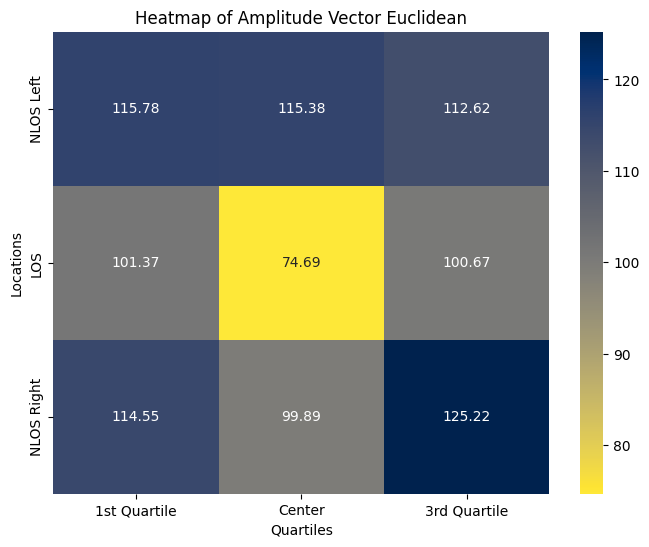

In [29]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_LOSCenter2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [30]:
Amplitude_Vector_Euclidean_LOSFirstQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_LOSFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_LOSFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_LOSFirstQuartile2_Cleaned),
    ],
])

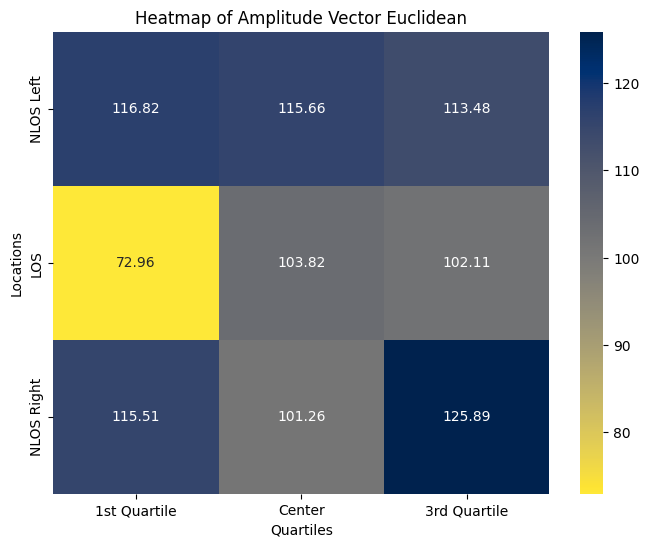

In [31]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_LOSFirstQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [32]:
Amplitude_Vector_Euclidean_LOSThirdQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_LOSThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_LOSThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_LOSThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_LOSThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_LOSThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_LOSThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_LOSThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_LOSThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_LOSThirdQuartile2_Cleaned),
    ],
])

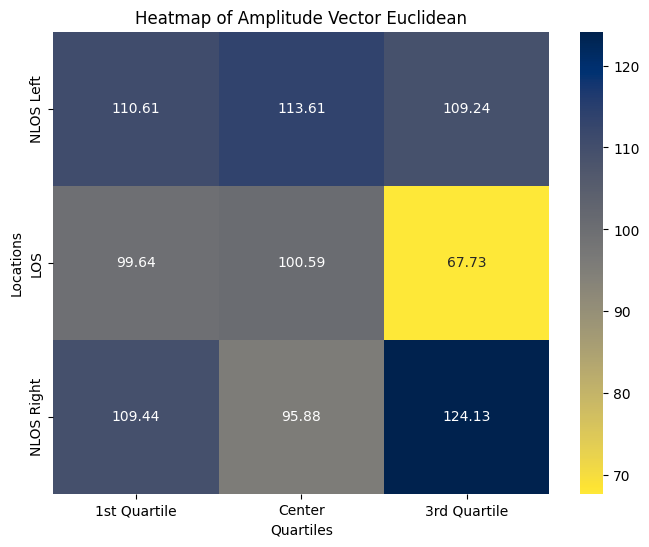

In [33]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_LOSThirdQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [34]:
Amplitude_Vector_Euclidean_NLOSLeftCenter2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_NLOSLeftCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_NLOSLeftCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_NLOSLeftCenter2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_NLOSLeftCenter2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_NLOSLeftCenter2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_NLOSLeftCenter2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_NLOSLeftCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_NLOSLeftCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_NLOSLeftCenter2_Cleaned),
    ],
])

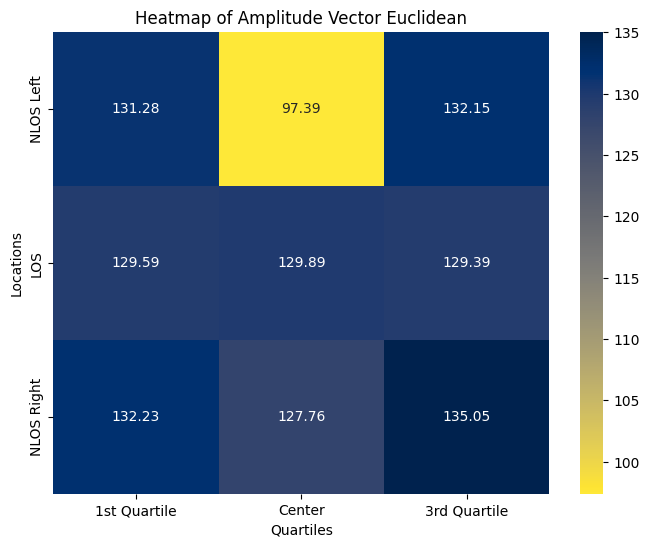

In [35]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_NLOSLeftCenter2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [36]:
Amplitude_Vector_Euclidean_NLOSLeftFirstQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_NLOSLeftFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_NLOSLeftFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_NLOSLeftFirstQuartile2_Cleaned),
    ],
])

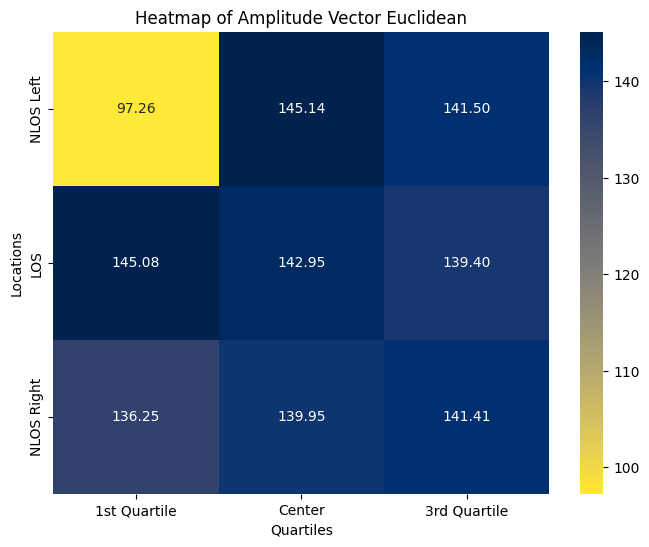

In [37]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_NLOSLeftFirstQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [38]:
Amplitude_Vector_Euclidean_NLOSLeftThirdQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_NLOSLeftThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_NLOSLeftThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_NLOSLeftThirdQuartile2_Cleaned),
    ],
])

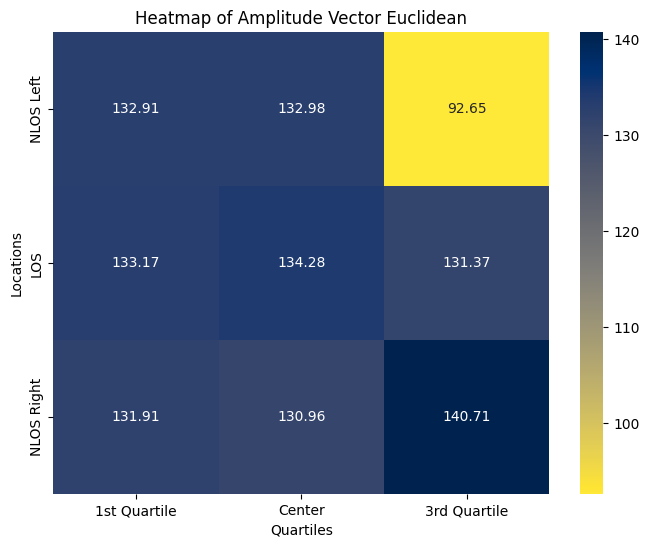

In [39]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_NLOSLeftThirdQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [40]:
Amplitude_Vector_Euclidean_NLOSRightCenter2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_NLOSRightCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_NLOSRightCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_NLOSRightCenter2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_NLOSRightCenter2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_NLOSRightCenter2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_NLOSRightCenter2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_NLOSRightCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_NLOSRightCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_NLOSRightCenter2_Cleaned),
    ],
])

In [41]:
Amplitude_Vector_Euclidean_NLOSRightFirstQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_NLOSRightFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_NLOSRightFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_NLOSRightFirstQuartile2_Cleaned),
    ],
])

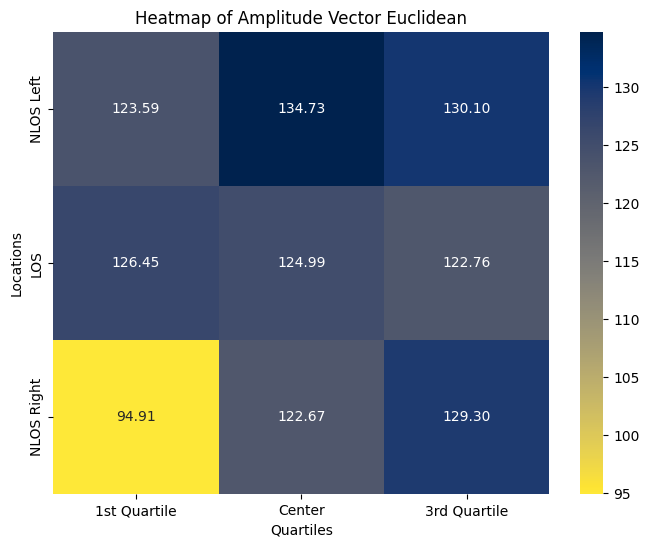

In [42]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_NLOSRightFirstQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [43]:
Amplitude_Vector_Euclidean_NLOSRightThirdQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_NLOSRightThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_NLOSRightThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_NLOSRightThirdQuartile2_Cleaned),
    ],
])

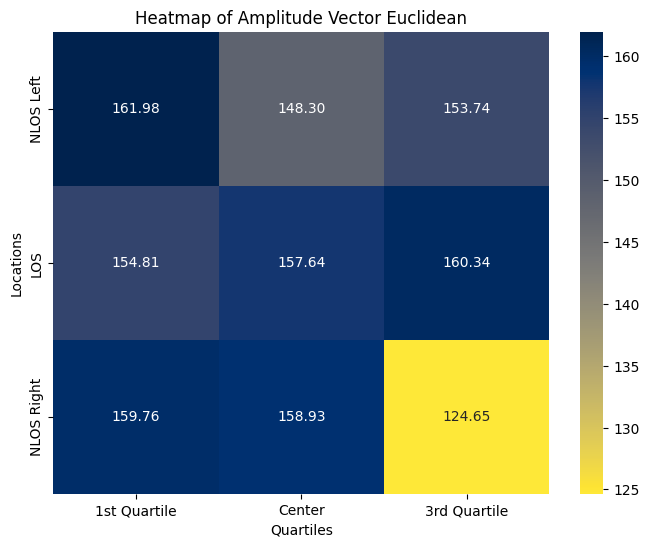

In [44]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_NLOSRightThirdQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

#### Heat Map Smooth for Amplitude Vector Cleaned Mean Array for 1, 2, 4(2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as distance
from scipy.interpolate import griddata

def plot_HeatMapVectorSmooth(data_array):
    # Compute Euclidean distances for 3x3 grid
    Result_Array = np.array([
        [
            distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, data_array),
            distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, data_array),
            distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, data_array),
        ],
        [
            distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, data_array),
            distance.euclidean(amplitude_LOSCenter_Mean_Array, data_array),
            distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, data_array),
        ],
        [
            distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, data_array),
            distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, data_array),
            distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, data_array),
        ],
    ])

    # Define 3x3 grid positions
    x = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2])
    y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

    # Flatten Result_Array to match positions
    values = Result_Array.flatten()

    # Generate fine grid for interpolation
    grid_x, grid_y = np.mgrid[0:2:100j, 0:2:100j]  # Smooth interpolation

    # Interpolate data
    grid_values = griddata((x, y), values, (grid_x, grid_y), method='linear')

    # Create heatmap
    plt.figure(figsize=(6, 6))
    plt.imshow(grid_values.T, extent=(0, 2, 0, 2), origin='lower', cmap="cividis_r")
    # plt.imshow(values)
    plt.colorbar(label="Euclidean Distance")
    plt.title("Heatmap of Amplitude Vector Euclidean Distances")
    plt.xlabel("Quartiles")
    plt.ylabel("Locations")
    plt.show()


In [ ]:
plot_HeatMapVectorSmooth(amplitude_LOSCenter2_Cleaned)

In [ ]:
plot_HeatMapVectorSmooth(amplitude_LOSFirstQuartile2_Cleaned)

In [ ]:
plot_HeatMapVectorSmooth(amplitude_LOSThirdQuartile2_Cleaned)

In [ ]:
plot_HeatMapVectorSmooth(amplitude_NLOSLeftCenter2_Cleaned)

#### Other Heat Maps

In [ ]:
Amplitude_Vector_Eucleidian_LOSFirstQuartile2 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_LOSFirstQuartile2),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_LOSFirstQuartile2),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_LOSFirstQuartile2),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_LOSFirstQuartile2),
        distance.euclidean(amplitude_LOSCenter, amplitude_LOSFirstQuartile2),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_LOSFirstQuartile2),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_LOSFirstQuartile2),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_LOSFirstQuartile2),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_LOSFirstQuartile2),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSFirstQuartile2, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Eucleidian_LOSCenter2 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_LOSCenter2),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_LOSCenter2),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_LOSCenter2),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_LOSCenter2),
        distance.euclidean(amplitude_LOSCenter, amplitude_LOSCenter2),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_LOSCenter2),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_LOSCenter2),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_LOSCenter2),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_LOSCenter2),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSCenter2, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Eucleidian_LOSThirdQuartile2 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_LOSThirdQuartile2),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_LOSThirdQuartile2),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_LOSThirdQuartile2),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_LOSThirdQuartile2),
        distance.euclidean(amplitude_LOSCenter, amplitude_LOSThirdQuartile2),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_LOSThirdQuartile2),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_LOSThirdQuartile2),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_LOSThirdQuartile2),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_LOSThirdQuartile2),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSThirdQuartile2, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Eucleidian_LOSFirstQuartile4 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_LOSFirstQuartile4),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_LOSFirstQuartile4),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_LOSFirstQuartile4),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_LOSFirstQuartile4),
        distance.euclidean(amplitude_LOSCenter, amplitude_LOSFirstQuartile4),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_LOSFirstQuartile4),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_LOSFirstQuartile4),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_LOSFirstQuartile4),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_LOSFirstQuartile4),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSFirstQuartile4, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Eucleidian_LOSCenter4 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_LOSCenter4),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_LOSCenter4),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_LOSCenter4),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_LOSCenter4),
        distance.euclidean(amplitude_LOSCenter, amplitude_LOSCenter4),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_LOSCenter4),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_LOSCenter4),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_LOSCenter4),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_LOSCenter4),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSCenter4, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Eucleidian_2LOSCenter4 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile2, amplitude_LOSCenter4),
        distance.euclidean(amplitude_NLOSLeftCenter2, amplitude_LOSCenter4),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile2, amplitude_LOSCenter4),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile2, amplitude_LOSCenter4),
        distance.euclidean(amplitude_LOSCenter2, amplitude_LOSCenter4),
        distance.euclidean(amplitude_LOSThirdQuartile2, amplitude_LOSCenter4),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile2, amplitude_LOSCenter4),
        distance.euclidean(amplitude_NLOSRightCenter2, amplitude_LOSCenter4),
        distance.euclidean(amplitude_NLOSRightThirdQuartile2, amplitude_LOSCenter4),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_2LOSCenter4, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Eucleidian_NLOSLeftFirstQuartile2 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_NLOSLeftFirstQuartile2),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_NLOSLeftFirstQuartile2),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_NLOSLeftFirstQuartile2),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_NLOSLeftFirstQuartile2),
        distance.euclidean(amplitude_LOSCenter, amplitude_NLOSLeftFirstQuartile2),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_NLOSLeftFirstQuartile2),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_NLOSLeftFirstQuartile2),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_NLOSLeftFirstQuartile2),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_NLOSLeftFirstQuartile2),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_NLOSLeftFirstQuartile2, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Eucleidian_NLOSLeftThirdQuartile2 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_NLOSLeftThirdQuartile2),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_NLOSLeftThirdQuartile2),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_NLOSLeftThirdQuartile2),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_NLOSLeftThirdQuartile2),
        distance.euclidean(amplitude_LOSCenter, amplitude_NLOSLeftThirdQuartile2),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_NLOSLeftThirdQuartile2),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_NLOSLeftThirdQuartile2),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_NLOSLeftThirdQuartile2),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_NLOSLeftThirdQuartile2),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_NLOSLeftThirdQuartile2, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Eucleidian_NLOSRightThirdQuartile2 = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_NLOSRightThirdQuartile2),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_NLOSRightThirdQuartile2),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_NLOSRightThirdQuartile2),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_NLOSRightThirdQuartile2),
        distance.euclidean(amplitude_LOSCenter, amplitude_NLOSRightThirdQuartile2),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_NLOSRightThirdQuartile2),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_NLOSRightThirdQuartile2),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_NLOSRightThirdQuartile2),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_NLOSRightThirdQuartile2),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_NLOSRightThirdQuartile2, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Eucleidian_LOSFirstQuartile2_Cleaned = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Cleaned, amplitude_LOSFirstQuartile2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSFirstQuartile2_Cleaned, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Eucleidian_LOSCenter2_Cleaned = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Cleaned, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Cleaned, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Cleaned, amplitude_LOSCenter2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Cleaned, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Cleaned, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Cleaned, amplitude_LOSCenter2_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Cleaned, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Cleaned, amplitude_LOSCenter2_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Cleaned, amplitude_LOSCenter2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSCenter2_Cleaned, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Eucleidian_LOSCenter_Cleaned = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Cleaned, amplitude_LOSCenter_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Cleaned, amplitude_LOSCenter_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Cleaned, amplitude_LOSCenter_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Cleaned, amplitude_LOSCenter_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Cleaned, amplitude_LOSCenter_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Cleaned, amplitude_LOSCenter_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Cleaned, amplitude_LOSCenter_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Cleaned, amplitude_LOSCenter_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Cleaned, amplitude_LOSCenter_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSCenter_Cleaned, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Eucleidian_LOSCenter = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile, amplitude_LOSCenter),
        distance.euclidean(amplitude_NLOSLeftCenter, amplitude_LOSCenter),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile, amplitude_LOSCenter),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile, amplitude_LOSCenter),
        distance.euclidean(amplitude_LOSCenter, amplitude_LOSCenter),
        distance.euclidean(amplitude_LOSThirdQuartile, amplitude_LOSCenter),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile, amplitude_LOSCenter),
        distance.euclidean(amplitude_NLOSRightCenter, amplitude_LOSCenter),
        distance.euclidean(amplitude_NLOSRightThirdQuartile, amplitude_LOSCenter),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Eucleidian_LOSCenter, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

### Phasse Vector

In [19]:
Phase_Vectors_Raw1 = [
    sanitize_vector(calculate_IQ_Angle(dataWithOutInterference)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftFirstQuartile)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftCenter)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftThirdQuartile)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSFirstQuartile)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSCenter)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSThirdQuartile)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightFirstQuartile)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightCenter)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightThirdQuartile)),
]

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_21436\2377027175.py:6: RuntimeWarning: divide by zero encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_21436\2377027175.py:6: RuntimeWarning: invalid value encountered in divide
  angle = np.arctan(Q/I)


In [20]:
Phase_Vectors_Raw2 = [
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSFirstQuartile2)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSCenter2)),

    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftFirstQuartile2)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftCenter2)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftThirdQuartile2)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSThirdQuartile2)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightFirstQuartile2)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightCenter2)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightThirdQuartile2)),
]

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_21436\2377027175.py:6: RuntimeWarning: divide by zero encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_21436\2377027175.py:6: RuntimeWarning: invalid value encountered in divide
  angle = np.arctan(Q/I)


In [21]:
Phase_Vectors_Raw4 = [
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftFirstQuartile4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftCenter4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftThirdQuartile4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSFirstQuartile4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSCenter4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSThirdQuartile4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightFirstQuartile4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightCenter4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightThirdQuartile4)),
]

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_21436\2377027175.py:6: RuntimeWarning: divide by zero encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_21436\2377027175.py:6: RuntimeWarning: invalid value encountered in divide
  angle = np.arctan(Q/I)


In [23]:
Phase_Vectors_Raw = (Phase_Vectors_Raw1 + Phase_Vectors_Raw2 +  Phase_Vectors_Raw4)
# Phase_Vectors_Raw = (Phase_Vectors_Raw1 + Phase_Vectors_Raw2)

In [24]:
Phase_Vectors = truncate_vectors_to_same_size(*Phase_Vectors_Raw)

# Map back truncated vectors to their variables
(
    phase_WithOutInterference,
    
    phase_NLOSLeftFirstQuartile,
    phase_NLOSLeftCenter,
    phase_NLOSLeftThirdQuartile,
    phase_LOSFirstQuartile,
    phase_LOSCenter,
    phase_LOSThirdQuartile,
    phase_NLOSRightFirstQuartile,
    phase_NLOSRightCenter,
    phase_NLOSRightThirdQuartile,

    phase_LOSFirstQuartile2,
    phase_LOSCenter2,

    phase_NLOSLeftFirstQuartile2,
    phase_NLOSLeftCenter2,
    phase_NLOSLeftThirdQuartile2,
    
    phase_LOSThirdQuartile2,
    phase_NLOSRightFirstQuartile2,
    phase_NLOSRightCenter2,
    phase_NLOSRightThirdQuartile2,

    phase_NLOSLeftFirstQuartile4,
    phase_NLOSLeftCenter4,
    phase_NLOSLeftThirdQuartile4,
    phase_LOSFirstQuartile4,
    phase_LOSCenter4,
    phase_LOSThirdQuartile4,
    phase_NLOSRightFirstQuartile4,
    phase_NLOSRightCenter4,
    phase_NLOSRightThirdQuartile4,
) = Phase_Vectors

In [25]:
phase_NLOSLeftFirstQuartile_Cleaned = phase_NLOSLeftFirstQuartile - phase_WithOutInterference
phase_NLOSLeftCenter_Cleaned = phase_NLOSLeftCenter - phase_WithOutInterference
phase_NLOSLeftThirdQuartile_Cleaned =  phase_NLOSLeftThirdQuartile - phase_WithOutInterference
phase_LOSFirstQuartile_Cleaned = phase_LOSFirstQuartile - phase_WithOutInterference
phase_LOSCenter_Cleaned = phase_LOSCenter - phase_WithOutInterference
phase_LOSThirdQuartile_Cleaned = phase_LOSThirdQuartile - phase_WithOutInterference
phase_NLOSRightFirstQuartile_Cleaned = phase_NLOSRightFirstQuartile - phase_WithOutInterference
phase_NLOSRightCenter_Cleaned = phase_NLOSRightCenter - phase_WithOutInterference
phase_NLOSRightThirdQuartile_Cleaned = phase_NLOSRightThirdQuartile - phase_WithOutInterference

phase_LOSFirstQuartile2_Cleaned = phase_LOSFirstQuartile2 - phase_WithOutInterference
phase_LOSCenter2_Cleaned = phase_LOSCenter2 - phase_WithOutInterference

phase_NLOSLeftFirstQuartile2_Cleaned = phase_NLOSLeftFirstQuartile2 - phase_WithOutInterference
phase_NLOSLeftCenter2_Cleaned = phase_NLOSLeftCenter2 - phase_WithOutInterference
phase_NLOSLeftThirdQuartile2_Cleaned =  phase_NLOSLeftThirdQuartile2 - phase_WithOutInterference
phase_LOSThirdQuartile2_Cleaned = phase_LOSThirdQuartile2 - phase_WithOutInterference
phase_NLOSRightFirstQuartile2_Cleaned = phase_NLOSRightFirstQuartile2 - phase_WithOutInterference
phase_NLOSRightCenter2_Cleaned = phase_NLOSRightCenter2 - phase_WithOutInterference
phase_NLOSRightThirdQuartile2_Cleaned = phase_NLOSRightThirdQuartile2 - phase_WithOutInterference

phase_NLOSLeftFirstQuartile4_Cleaned = phase_NLOSLeftFirstQuartile4 - phase_WithOutInterference
phase_NLOSLeftCenter4_Cleaned = phase_NLOSLeftCenter4 - phase_WithOutInterference
phase_NLOSLeftThirdQuartile4_Cleaned =  phase_NLOSLeftThirdQuartile4 - phase_WithOutInterference
phase_LOSFirstQuartile4_Cleaned = phase_LOSFirstQuartile4 - phase_WithOutInterference
phase_LOSCenter4_Cleaned = phase_LOSCenter4 - phase_WithOutInterference
phase_LOSThirdQuartile4_Cleaned = phase_LOSThirdQuartile4 - phase_WithOutInterference
phase_NLOSRightFirstQuartile4_Cleaned = phase_NLOSRightFirstQuartile4 - phase_WithOutInterference
phase_NLOSRightCenter4_Cleaned = phase_NLOSRightCenter4 - phase_WithOutInterference
phase_NLOSRightThirdQuartile4_Cleaned = phase_NLOSRightThirdQuartile4 - phase_WithOutInterference

#### Phase Vector Cleaned Mean Array Calculation for 1, 2, 4

In [ ]:
phase_LOSCenter_Array = np.array([phase_LOSCenter_Cleaned, phase_LOSCenter2_Cleaned, phase_LOSCenter4_Cleaned])
phase_LOSCenter_Mean_Array = np.mean(phase_LOSCenter_Array, axis=0)
phase_LOSFirstQuartile_Array = np.array([phase_LOSFirstQuartile_Cleaned, phase_LOSFirstQuartile2_Cleaned, phase_LOSFirstQuartile4_Cleaned])
phase_LOSFirstQuartile_Mean_Array = np.mean(phase_LOSFirstQuartile_Array, axis=0)
phase_LOSThirdQuartile_Array = np.array([phase_LOSThirdQuartile_Cleaned, phase_LOSThirdQuartile2_Cleaned, phase_LOSThirdQuartile4_Cleaned])
phase_LOSThirdQuartile_Mean_Array = np.mean(phase_LOSThirdQuartile_Array, axis=0)

In [ ]:
phase_NLOSLeftCenter_Array = np.array([phase_NLOSLeftCenter_Cleaned, phase_NLOSLeftCenter2_Cleaned, phase_NLOSLeftCenter4_Cleaned])
phase_NLOSLeftCenter_Mean_Array = np.mean(phase_NLOSLeftCenter_Array, axis=0)
phase_NLOSLeftFirstQuartile_Array = np.array([phase_NLOSLeftFirstQuartile_Cleaned, phase_NLOSLeftFirstQuartile2_Cleaned, phase_NLOSLeftFirstQuartile4_Cleaned])
phase_NLOSLeftFirstQuartile_Mean_Array = np.mean(phase_NLOSLeftFirstQuartile_Array, axis=0)
phase_NLOSLeftThirdQuartile_Array = np.array([phase_NLOSLeftThirdQuartile_Cleaned, phase_NLOSLeftThirdQuartile2_Cleaned, phase_NLOSLeftThirdQuartile4_Cleaned])
phase_NLOSLeftThirdQuartile_Mean_Array = np.mean(phase_NLOSLeftThirdQuartile_Array, axis=0)

In [ ]:
phase_NLOSRightCenter_Array = np.array([phase_NLOSRightCenter_Cleaned, phase_NLOSRightCenter2_Cleaned, phase_NLOSRightCenter4_Cleaned])
phase_NLOSRightCenter_Mean_Array = np.mean(phase_NLOSRightCenter_Array, axis=0)
phase_NLOSRightFirstQuartile_Array = np.array([phase_NLOSRightFirstQuartile_Cleaned, phase_NLOSRightFirstQuartile2_Cleaned, phase_NLOSRightFirstQuartile4_Cleaned])
phase_NLOSRightFirstQuartile_Mean_Array = np.mean(phase_NLOSRightFirstQuartile_Array, axis=0)
phase_NLOSRightThirdQuartile_Array = np.array([phase_NLOSRightThirdQuartile_Cleaned, phase_NLOSRightThirdQuartile2_Cleaned, phase_NLOSRightThirdQuartile4_Cleaned])
phase_NLOSRightThirdQuartile_Mean_Array = np.mean(phase_NLOSRightThirdQuartile_Array, axis=0)

#### Phase Vector Cleaned Mean Array Calculation for 1, 4

In [26]:
phase_LOSCenter_Array14 = np.array([phase_LOSCenter_Cleaned, phase_LOSCenter4_Cleaned])
phase_LOSCenter_Mean_Array14 = np.mean(phase_LOSCenter_Array14, axis=0)
phase_LOSFirstQuartile_Array14 = np.array([phase_LOSFirstQuartile_Cleaned, phase_LOSFirstQuartile4_Cleaned])
phase_LOSFirstQuartile_Mean_Array14 = np.mean(phase_LOSFirstQuartile_Array14, axis=0)
phase_LOSThirdQuartile_Array14 = np.array([phase_LOSThirdQuartile_Cleaned, phase_LOSThirdQuartile4_Cleaned])
phase_LOSThirdQuartile_Mean_Array14 = np.mean(phase_LOSThirdQuartile_Array14, axis=0)

In [27]:
phase_NLOSLeftCenter_Array14 = np.array([phase_NLOSLeftCenter_Cleaned, phase_NLOSLeftCenter4_Cleaned])
phase_NLOSLeftCenter_Mean_Array14 = np.mean(phase_NLOSLeftCenter_Array14, axis=0)
phase_NLOSLeftFirstQuartile_Array14 = np.array([phase_NLOSLeftFirstQuartile_Cleaned, phase_NLOSLeftFirstQuartile4_Cleaned])
phase_NLOSLeftFirstQuartile_Mean_Array14 = np.mean(phase_NLOSLeftFirstQuartile_Array14, axis=0)
phase_NLOSLeftThirdQuartile_Array14 = np.array([phase_NLOSLeftThirdQuartile_Cleaned, phase_NLOSLeftThirdQuartile4_Cleaned])
phase_NLOSLeftThirdQuartile_Mean_Array14 = np.mean(phase_NLOSLeftThirdQuartile_Array14, axis=0)

In [28]:
phase_NLOSRightCenter_Array14 = np.array([phase_NLOSRightCenter_Cleaned, phase_NLOSRightCenter4_Cleaned])
phase_NLOSRightCenter_Mean_Array14 = np.mean(phase_NLOSRightCenter_Array14, axis=0)
phase_NLOSRightFirstQuartile_Array14 = np.array([phase_NLOSRightFirstQuartile_Cleaned, phase_NLOSRightFirstQuartile4_Cleaned])
phase_NLOSRightFirstQuartile_Mean_Array14 = np.mean(phase_NLOSRightFirstQuartile_Array14, axis=0)
phase_NLOSRightThirdQuartile_Array14 = np.array([phase_NLOSRightThirdQuartile_Cleaned, phase_NLOSRightThirdQuartile4_Cleaned])
phase_NLOSRightThirdQuartile_Mean_Array14 = np.mean(phase_NLOSRightThirdQuartile_Array14, axis=0)

#### Heat Map for Phase Vector Cleaned Mean Array for 1, 4(2)

In [29]:
Phase_Vector_Euclidean_LOSCenter2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_LOSCenter2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_LOSCenter2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_LOSCenter2_Cleaned),
    ],
])

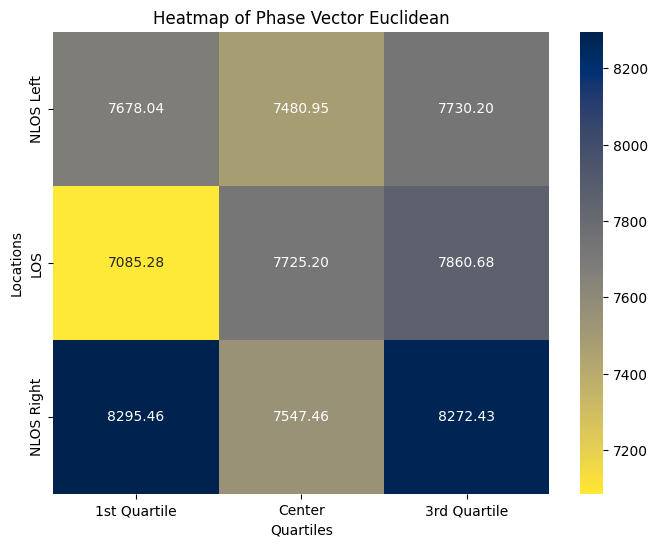

In [30]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSCenter2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [31]:
Phase_Vector_Euclidean_LOSFirstQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_LOSFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_LOSFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_LOSFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_LOSFirstQuartile2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_LOSFirstQuartile2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_LOSFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_LOSFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_LOSFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_LOSFirstQuartile2_Cleaned),
    ],
])

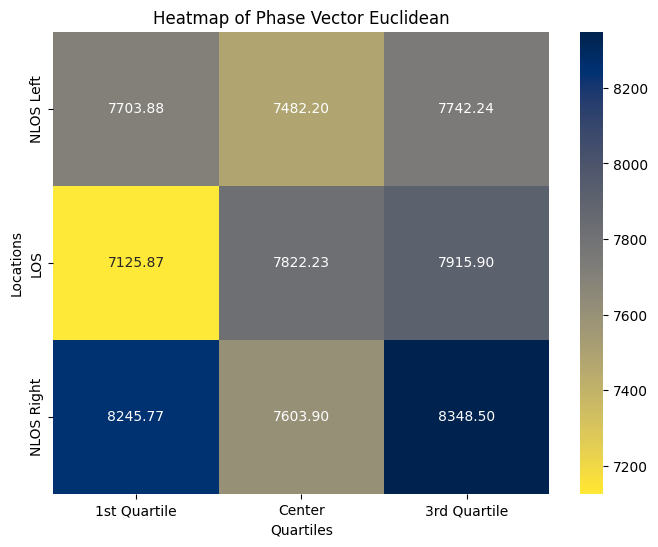

In [32]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSFirstQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [33]:
Phase_Vector_Euclidean_LOSThirdQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_LOSThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_LOSThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_LOSThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_LOSThirdQuartile2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_LOSThirdQuartile2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_LOSThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_LOSThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_LOSThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_LOSThirdQuartile2_Cleaned),
    ],
])

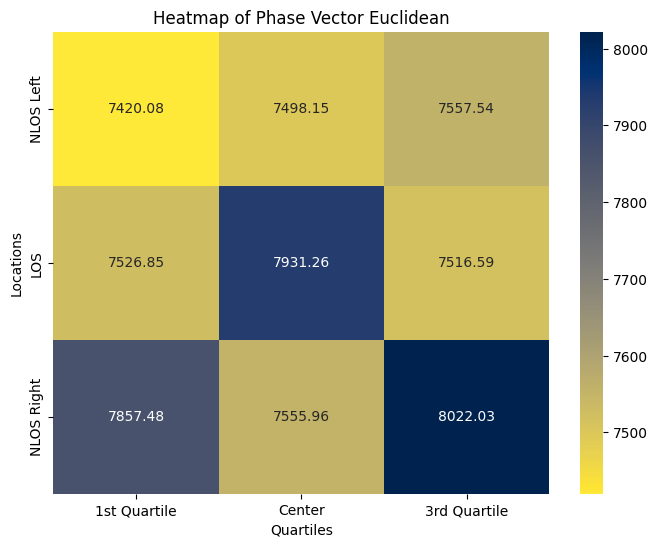

In [34]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSThirdQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [35]:
Phase_Vector_Euclidean_NLOSRightCenter2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_NLOSRightCenter2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_NLOSRightCenter2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_NLOSRightCenter2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_NLOSRightCenter2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_NLOSRightCenter2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_NLOSRightCenter2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_NLOSRightCenter2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_NLOSRightCenter2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_NLOSRightCenter2_Cleaned),
    ],
])

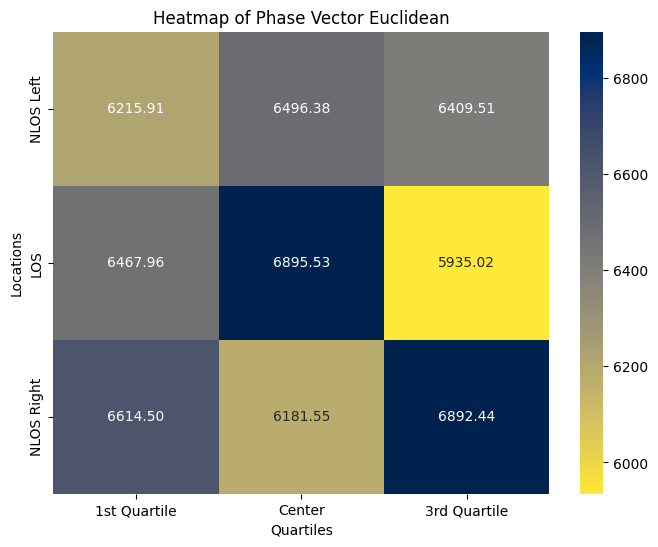

In [36]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSRightCenter2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [37]:
Phase_Vector_Euclidean_NLOSRightFirstQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_NLOSRightFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_NLOSRightFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_NLOSRightFirstQuartile2_Cleaned),
    ],
])

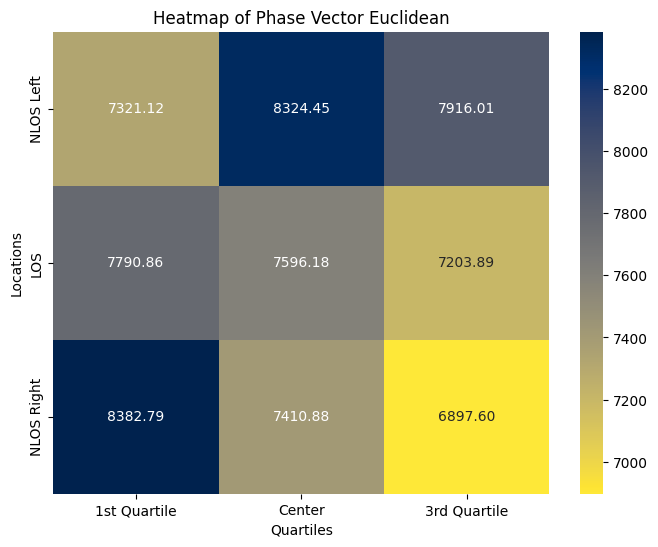

In [38]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSRightFirstQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [39]:
Phase_Vector_Euclidean_NLOSRightThirdQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_NLOSRightThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_NLOSRightThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_NLOSRightThirdQuartile2_Cleaned),
    ],
])

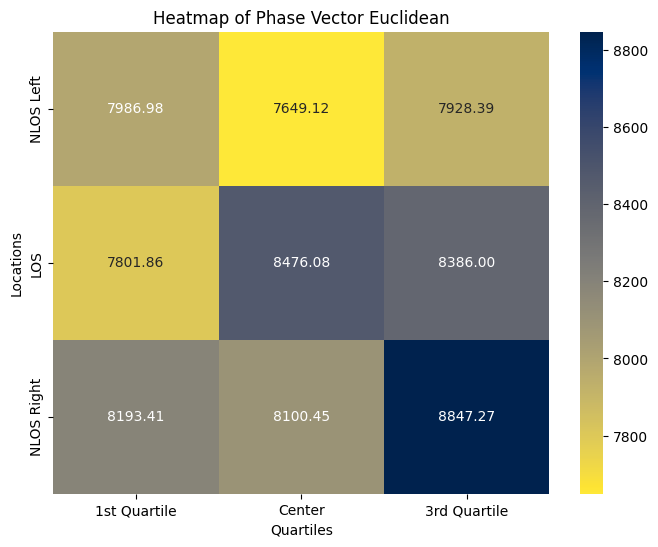

In [40]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSRightThirdQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [41]:
Phase_Vector_Euclidean_NLOSLeftThirdQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_NLOSLeftThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_NLOSLeftThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_NLOSLeftThirdQuartile2_Cleaned),
    ],
])

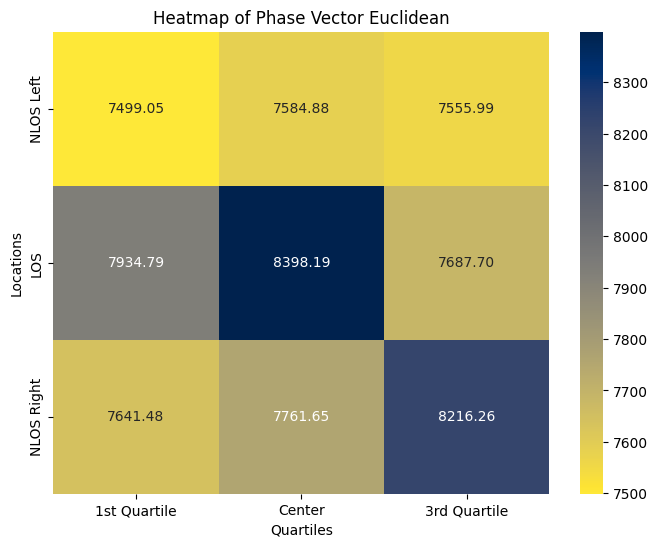

In [42]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSLeftThirdQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [43]:
Phase_Vector_Euclidean_NLOSLeftFirstQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_NLOSLeftFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_NLOSLeftFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_NLOSLeftFirstQuartile2_Cleaned),
    ],
])

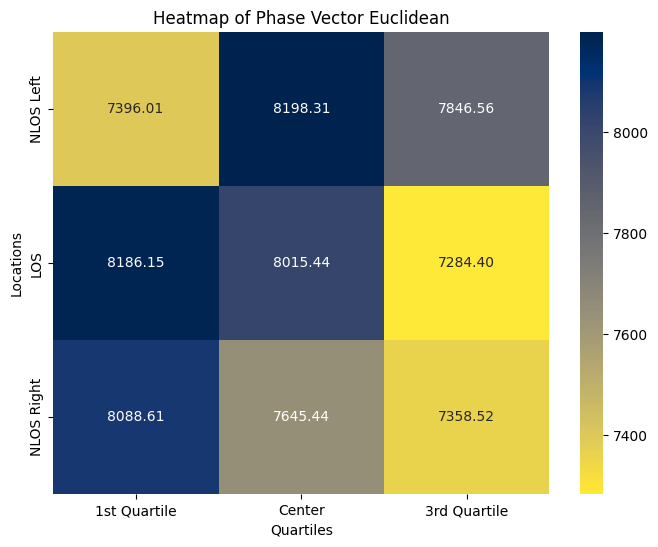

In [44]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSLeftFirstQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [45]:
Phase_Vector_Euclidean_NLOSLeftCenter2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_NLOSLeftCenter2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_NLOSLeftCenter2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_NLOSLeftCenter2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_NLOSLeftCenter2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_NLOSLeftCenter2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_NLOSLeftCenter2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_NLOSLeftCenter2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_NLOSLeftCenter2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_NLOSLeftCenter2_Cleaned),
    ],
])

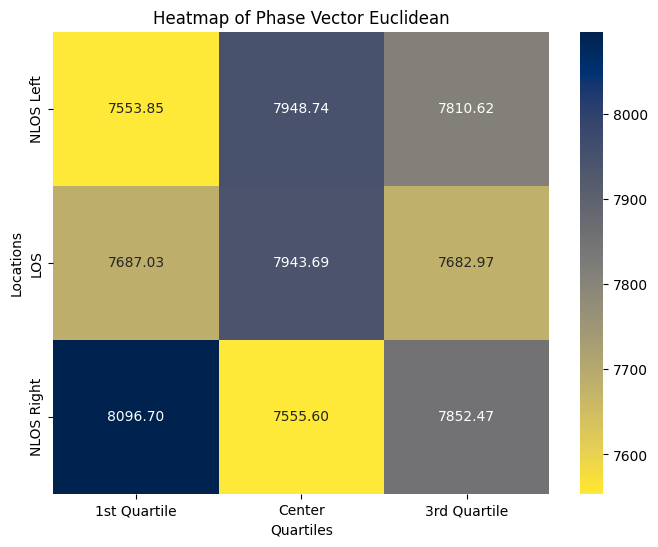

In [46]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSLeftCenter2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

#### Heat Map for Phase Vector Cleaned Mean Array for 1, 2, 4(2)

In [ ]:
Phase_Vector_Euclidean_LOSCenter2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array, phase_LOSCenter2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array, phase_LOSCenter2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array, phase_LOSCenter2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSCenter2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSLeftThirdQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array, phase_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array, phase_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array, phase_NLOSLeftThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array, phase_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array, phase_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array, phase_NLOSLeftThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array, phase_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array, phase_NLOSLeftThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array, phase_NLOSLeftThirdQuartile2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSLeftThirdQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSLeftFirstQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array, phase_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array, phase_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array, phase_NLOSLeftFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array, phase_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array, phase_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array, phase_NLOSLeftFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array, phase_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array, phase_NLOSLeftFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array, phase_NLOSLeftFirstQuartile2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSLeftFirstQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSLeftCenter2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array, phase_NLOSLeftCenter2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array, phase_NLOSLeftCenter2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array, phase_NLOSLeftCenter2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array, phase_NLOSLeftCenter2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array, phase_NLOSLeftCenter2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array, phase_NLOSLeftCenter2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array, phase_NLOSLeftCenter2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array, phase_NLOSLeftCenter2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array, phase_NLOSLeftCenter2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSLeftCenter2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_LOSFirstQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array, phase_LOSFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array, phase_LOSFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array, phase_LOSFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array, phase_LOSFirstQuartile2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array, phase_LOSFirstQuartile2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array, phase_LOSFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array, phase_LOSFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array, phase_LOSFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array, phase_LOSFirstQuartile2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSFirstQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_LOSThirdQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array, phase_LOSThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array, phase_LOSThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array, phase_LOSThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array, phase_LOSThirdQuartile2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array, phase_LOSThirdQuartile2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array, phase_LOSThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array, phase_LOSThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array, phase_LOSThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array, phase_LOSThirdQuartile2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSThirdQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSRightCenter2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array, phase_NLOSRightCenter2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array, phase_NLOSRightCenter2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array, phase_NLOSRightCenter2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array, phase_NLOSRightCenter2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array, phase_NLOSRightCenter2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array, phase_NLOSRightCenter2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array, phase_NLOSRightCenter2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array, phase_NLOSRightCenter2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array, phase_NLOSRightCenter2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSRightCenter2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSRightFirstQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array, phase_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array, phase_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array, phase_NLOSRightFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array, phase_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array, phase_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array, phase_NLOSRightFirstQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array, phase_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array, phase_NLOSRightFirstQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array, phase_NLOSRightFirstQuartile2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSRightFirstQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSRightThirdQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array, phase_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array, phase_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array, phase_NLOSRightThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array, phase_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array, phase_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array, phase_NLOSRightThirdQuartile2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array, phase_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array, phase_NLOSRightThirdQuartile2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array, phase_NLOSRightThirdQuartile2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSRightThirdQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

#### Other Heat Map 

In [ ]:
Phase_Vector_Euclidean_LOSCenter2 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile, phase_LOSCenter2),
        distance.euclidean(phase_NLOSLeftCenter, phase_LOSCenter2),
        distance.euclidean(phase_NLOSLeftThirdQuartile, phase_LOSCenter2),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile, phase_LOSCenter2),
        distance.euclidean(phase_LOSCenter, phase_LOSCenter2),
        distance.euclidean(phase_LOSThirdQuartile, phase_LOSCenter2),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile, phase_LOSCenter2),
        distance.euclidean(phase_NLOSRightCenter, phase_LOSCenter2),
        distance.euclidean(phase_NLOSRightThirdQuartile, phase_LOSCenter2),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSCenter2, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_LOSCenter4 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile, phase_LOSCenter4),
        distance.euclidean(phase_NLOSLeftCenter, phase_LOSCenter4),
        distance.euclidean(phase_NLOSLeftThirdQuartile, phase_LOSCenter4),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile, phase_LOSCenter4),
        distance.euclidean(phase_LOSCenter, phase_LOSCenter4),
        distance.euclidean(phase_LOSThirdQuartile, phase_LOSCenter4),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile, phase_LOSCenter4),
        distance.euclidean(phase_NLOSRightCenter, phase_LOSCenter4),
        distance.euclidean(phase_NLOSRightThirdQuartile, phase_LOSCenter4),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSCenter4, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_LOSFirstQuartile2 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile, phase_LOSFirstQuartile2),
        distance.euclidean(phase_NLOSLeftCenter, phase_LOSFirstQuartile2),
        distance.euclidean(phase_NLOSLeftThirdQuartile, phase_LOSFirstQuartile2),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile, phase_LOSFirstQuartile2),
        distance.euclidean(phase_LOSCenter, phase_LOSFirstQuartile2),
        distance.euclidean(phase_LOSThirdQuartile, phase_LOSFirstQuartile2),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile, phase_LOSFirstQuartile2),
        distance.euclidean(phase_NLOSRightCenter, phase_LOSFirstQuartile2),
        distance.euclidean(phase_NLOSRightThirdQuartile, phase_LOSFirstQuartile2),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSFirstQuartile2, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_LOSFirstQuartile4 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile, phase_LOSFirstQuartile4),
        distance.euclidean(phase_NLOSLeftCenter, phase_LOSFirstQuartile4),
        distance.euclidean(phase_NLOSLeftThirdQuartile, phase_LOSFirstQuartile4),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile, phase_LOSFirstQuartile4),
        distance.euclidean(phase_LOSCenter, phase_LOSFirstQuartile4),
        distance.euclidean(phase_LOSThirdQuartile, phase_LOSFirstQuartile4),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile, phase_LOSFirstQuartile4),
        distance.euclidean(phase_NLOSRightCenter, phase_LOSFirstQuartile4),
        distance.euclidean(phase_NLOSRightThirdQuartile, phase_LOSFirstQuartile4),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSFirstQuartile4, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_LOSCenter2_Cleaned = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Cleaned, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Cleaned, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Cleaned, phase_LOSCenter2_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Cleaned, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_LOSCenter_Cleaned, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Cleaned, phase_LOSCenter2_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Cleaned, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Cleaned, phase_LOSCenter2_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Cleaned, phase_LOSCenter2_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSCenter2_Cleaned, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_LOSCenter_Cleaned = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Cleaned, phase_LOSCenter_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Cleaned, phase_LOSCenter_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Cleaned, phase_LOSCenter_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Cleaned, phase_LOSCenter_Cleaned),
        distance.euclidean(phase_LOSCenter_Cleaned, phase_LOSCenter_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Cleaned, phase_LOSCenter_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Cleaned, phase_LOSCenter_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Cleaned, phase_LOSCenter_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Cleaned, phase_LOSCenter_Cleaned),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSCenter_Cleaned, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
phase_LOSCenter_Cleaned_Array1 = phase_LOSCenter_Cleaned[::2]  # Elements at odd indices (0-based)
phase_LOSCenter_Cleaned_Array2 = phase_LOSCenter_Cleaned[1::2] 


phase_NLOSLeftFirstQuartile_Cleaned_Array1 = phase_NLOSLeftFirstQuartile_Cleaned[::2]
phase_NLOSLeftFirstQuartile_Cleaned_Array2 = phase_NLOSLeftFirstQuartile_Cleaned[1::2]
phase_NLOSLeftCenter_Cleaned_Array1 = phase_NLOSLeftCenter_Cleaned[::2]
phase_NLOSLeftCenter_Cleaned_Array2 = phase_NLOSLeftCenter_Cleaned[1::2]
phase_NLOSLeftThirdQuartile_Cleaned_Array1 = phase_NLOSLeftThirdQuartile_Cleaned[::2]
phase_NLOSLeftThirdQuartile_Cleaned_Array2 = phase_NLOSLeftThirdQuartile_Cleaned[1::2]
phase_LOSFirstQuartile_Cleaned_Array1 = phase_LOSFirstQuartile_Cleaned[::2]
phase_LOSFirstQuartile_Cleaned_Array2 = phase_LOSFirstQuartile_Cleaned[1::2]

phase_LOSThirdQuartile_Cleaned_Array1 = phase_LOSThirdQuartile_Cleaned[::2] 
phase_LOSThirdQuartile_Cleaned_Array2 = phase_LOSThirdQuartile_Cleaned[1::2] 
phase_NLOSRightFirstQuartile_Cleaned_Array1 = phase_NLOSRightFirstQuartile_Cleaned[::2]
phase_NLOSRightFirstQuartile_Cleaned_Array2 = phase_NLOSRightFirstQuartile_Cleaned[1::2]
phase_NLOSRightCenter_Cleaned_Array1 = phase_NLOSRightCenter_Cleaned[::2] 
phase_NLOSRightCenter_Cleaned_Array2 = phase_NLOSRightCenter_Cleaned[1::2] 
phase_NLOSRightThirdQuartile_Cleaned_Array1 = phase_NLOSRightThirdQuartile_Cleaned[::2]
phase_NLOSRightThirdQuartile_Cleaned_Array2 = phase_NLOSRightThirdQuartile_Cleaned[1::2] 

phase_LOSFirstQuartile2_Cleaned_Array1 = phase_LOSFirstQuartile2_Cleaned[::2] 
phase_LOSFirstQuartile2_Cleaned_Array2 = phase_LOSFirstQuartile2_Cleaned[1::2] 
phase_LOSCenter2_Cleaned_Array1 = phase_LOSCenter2_Cleaned[::2] 
phase_LOSCenter2_Cleaned_Array2 = phase_LOSCenter2_Cleaned[1::2] 

#### Heat Map for Phase Vector Cleaned Array for 2(divided it by 2)(2)

In [ ]:
Phase_Vector_Euclidean_LOSCenter_Cleaned_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Cleaned_Array1, phase_LOSCenter_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftCenter_Cleaned_Array1, phase_LOSCenter_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Cleaned_Array1, phase_LOSCenter_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Cleaned_Array1, phase_LOSCenter_Cleaned_Array2),
        distance.euclidean(phase_LOSCenter_Cleaned_Array1, phase_LOSCenter_Cleaned_Array2),
        distance.euclidean(phase_LOSThirdQuartile_Cleaned_Array1, phase_LOSCenter_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Cleaned_Array1, phase_LOSCenter_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightCenter_Cleaned_Array1, phase_LOSCenter_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightThirdQuartile_Cleaned_Array1, phase_LOSCenter_Cleaned_Array2),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSCenter_Cleaned_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSLeftThirdQuartile_Cleaned_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Cleaned_Array1, phase_NLOSLeftThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftCenter_Cleaned_Array1, phase_NLOSLeftThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Cleaned_Array1, phase_NLOSLeftThirdQuartile_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Cleaned_Array1, phase_NLOSLeftThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_LOSCenter_Cleaned_Array1, phase_NLOSLeftThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_LOSThirdQuartile_Cleaned_Array1, phase_NLOSLeftThirdQuartile_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Cleaned_Array1, phase_NLOSLeftThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightCenter_Cleaned_Array1, phase_NLOSLeftThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightThirdQuartile_Cleaned_Array1, phase_NLOSLeftThirdQuartile_Cleaned_Array2),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSLeftThirdQuartile_Cleaned_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_LOSFirstQuartile_Cleaned_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Cleaned_Array1, phase_LOSFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftCenter_Cleaned_Array1, phase_LOSFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Cleaned_Array1, phase_LOSFirstQuartile_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Cleaned_Array1, phase_LOSFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_LOSCenter_Cleaned_Array1, phase_LOSFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_LOSThirdQuartile_Cleaned_Array1, phase_LOSFirstQuartile_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Cleaned_Array1, phase_LOSFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightCenter_Cleaned_Array1, phase_LOSFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightThirdQuartile_Cleaned_Array1, phase_LOSFirstQuartile_Cleaned_Array2),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSFirstQuartile_Cleaned_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_LOSThirdQuartile_Cleaned_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Cleaned_Array1, phase_LOSThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftCenter_Cleaned_Array1, phase_LOSThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Cleaned_Array1, phase_LOSThirdQuartile_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Cleaned_Array1, phase_LOSThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_LOSCenter_Cleaned_Array1, phase_LOSThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_LOSThirdQuartile_Cleaned_Array1, phase_LOSThirdQuartile_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Cleaned_Array1, phase_LOSThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightCenter_Cleaned_Array1, phase_LOSThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightThirdQuartile_Cleaned_Array1, phase_LOSThirdQuartile_Cleaned_Array2),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSThirdQuartile_Cleaned_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSLeftFirstQuartile_Cleaned_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Cleaned_Array1, phase_NLOSLeftFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftCenter_Cleaned_Array1, phase_NLOSLeftFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Cleaned_Array1, phase_NLOSLeftFirstQuartile_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Cleaned_Array1, phase_NLOSLeftFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_LOSCenter_Cleaned_Array1, phase_NLOSLeftFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_LOSThirdQuartile_Cleaned_Array1, phase_NLOSLeftFirstQuartile_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Cleaned_Array1, phase_NLOSLeftFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightCenter_Cleaned_Array1, phase_NLOSLeftFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightThirdQuartile_Cleaned_Array1, phase_NLOSLeftFirstQuartile_Cleaned_Array2),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSLeftFirstQuartile_Cleaned_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSLeftCenter_Cleaned_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Cleaned_Array1, phase_NLOSLeftCenter_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftCenter_Cleaned_Array1, phase_NLOSLeftCenter_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Cleaned_Array1, phase_NLOSLeftCenter_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Cleaned_Array1, phase_NLOSLeftCenter_Cleaned_Array2),
        distance.euclidean(phase_LOSCenter_Cleaned_Array1, phase_NLOSLeftCenter_Cleaned_Array2),
        distance.euclidean(phase_LOSThirdQuartile_Cleaned_Array1, phase_NLOSLeftCenter_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Cleaned_Array1, phase_NLOSLeftCenter_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightCenter_Cleaned_Array1, phase_NLOSLeftCenter_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightThirdQuartile_Cleaned_Array1, phase_NLOSLeftCenter_Cleaned_Array2),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSLeftCenter_Cleaned_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSRightCenter_Cleaned_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Cleaned_Array1, phase_NLOSRightCenter_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftCenter_Cleaned_Array1, phase_NLOSRightCenter_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Cleaned_Array1, phase_NLOSRightCenter_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Cleaned_Array1, phase_NLOSRightCenter_Cleaned_Array2),
        distance.euclidean(phase_LOSCenter_Cleaned_Array1, phase_NLOSRightCenter_Cleaned_Array2),
        distance.euclidean(phase_LOSThirdQuartile_Cleaned_Array1, phase_NLOSRightCenter_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Cleaned_Array1, phase_NLOSRightCenter_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightCenter_Cleaned_Array1, phase_NLOSRightCenter_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightThirdQuartile_Cleaned_Array1, phase_NLOSRightCenter_Cleaned_Array2),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSRightCenter_Cleaned_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSRightFirstQuartile_Cleaned_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Cleaned_Array1, phase_NLOSRightFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftCenter_Cleaned_Array1, phase_NLOSRightFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Cleaned_Array1, phase_NLOSRightFirstQuartile_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Cleaned_Array1, phase_NLOSRightFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_LOSCenter_Cleaned_Array1, phase_NLOSRightFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_LOSThirdQuartile_Cleaned_Array1, phase_NLOSRightFirstQuartile_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Cleaned_Array1, phase_NLOSRightFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightCenter_Cleaned_Array1, phase_NLOSRightFirstQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightThirdQuartile_Cleaned_Array1, phase_NLOSRightFirstQuartile_Cleaned_Array2),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSRightFirstQuartile_Cleaned_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSRightThirdQuartile_Cleaned_Array = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Cleaned_Array1, phase_NLOSRightThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftCenter_Cleaned_Array1, phase_NLOSRightThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Cleaned_Array1, phase_NLOSRightThirdQuartile_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Cleaned_Array1, phase_NLOSRightThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_LOSCenter_Cleaned_Array1, phase_NLOSRightThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_LOSThirdQuartile_Cleaned_Array1, phase_NLOSRightThirdQuartile_Cleaned_Array2),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Cleaned_Array1, phase_NLOSRightThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightCenter_Cleaned_Array1, phase_NLOSRightThirdQuartile_Cleaned_Array2),
        distance.euclidean(phase_NLOSRightThirdQuartile_Cleaned_Array1, phase_NLOSRightThirdQuartile_Cleaned_Array2),
    ],
])

In [ ]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSRightThirdQuartile_Cleaned_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Eucleidian")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

### RSSI Vector

In [20]:
RSSI_Vectors_Raw1 = [
    sanitize_vector(calculate_rssi(dataWithOutInterference)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftFirstQuartile)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftCenter)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftThirdQuartile)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSFirstQuartile)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSCenter)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSThirdQuartile)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightFirstQuartile)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightCenter)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightThirdQuartile)),
]

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_3608\277351076.py:10: RuntimeWarning: divide by zero encountered in log10
  rssi = 10 * np.log10(I**2 + Q**2)


In [21]:
RSSI_Vectors_Raw2 = [
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSFirstQuartile2)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSCenter2)),

    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftFirstQuartile2)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftCenter2)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftThirdQuartile2)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSThirdQuartile2)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightFirstQuartile2)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightCenter2)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightThirdQuartile2)),
]

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_3608\277351076.py:10: RuntimeWarning: divide by zero encountered in log10
  rssi = 10 * np.log10(I**2 + Q**2)


In [22]:
RSSI_Vectors_Raw4 = [
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftFirstQuartile4)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftCenter4)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftThirdQuartile4)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSFirstQuartile4)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSCenter4)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSThirdQuartile4)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightFirstQuartile4)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightCenter4)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightThirdQuartile4)),
]

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_3608\277351076.py:10: RuntimeWarning: divide by zero encountered in log10
  rssi = 10 * np.log10(I**2 + Q**2)


In [23]:
RSSI_Vectors_Raw = (RSSI_Vectors_Raw1 + RSSI_Vectors_Raw2 +  RSSI_Vectors_Raw4)
# Phase_Vectors_Raw = (Phase_Vectors_Raw1 + Phase_Vectors_Raw2)

In [24]:
RSSI_Vectors = truncate_vectors_to_same_size(*RSSI_Vectors_Raw)

# Map back truncated vectors to their variables
(
    RSSI_WithOutInterference,
    
    RSSI_NLOSLeftFirstQuartile,
    RSSI_NLOSLeftCenter,
    RSSI_NLOSLeftThirdQuartile,
    RSSI_LOSFirstQuartile,
    RSSI_LOSCenter,
    RSSI_LOSThirdQuartile,
    RSSI_NLOSRightFirstQuartile,
    RSSI_NLOSRightCenter,
    RSSI_NLOSRightThirdQuartile,

    RSSI_LOSFirstQuartile2,
    RSSI_LOSCenter2,

    RSSI_NLOSLeftFirstQuartile2,
    RSSI_NLOSLeftCenter2,
    RSSI_NLOSLeftThirdQuartile2,
    
    RSSI_LOSThirdQuartile2,
    RSSI_NLOSRightFirstQuartile2,
    RSSI_NLOSRightCenter2,
    RSSI_NLOSRightThirdQuartile2,

    RSSI_NLOSLeftFirstQuartile4,
    RSSI_NLOSLeftCenter4,
    RSSI_NLOSLeftThirdQuartile4,
    RSSI_LOSFirstQuartile4,
    RSSI_LOSCenter4,
    RSSI_LOSThirdQuartile4,
    RSSI_NLOSRightFirstQuartile4,
    RSSI_NLOSRightCenter4,
    RSSI_NLOSRightThirdQuartile4,
) = RSSI_Vectors

In [25]:
RSSI_NLOSLeftFirstQuartile_Cleaned = RSSI_NLOSLeftFirstQuartile - RSSI_WithOutInterference
RSSI_NLOSLeftCenter_Cleaned = RSSI_NLOSLeftCenter - RSSI_WithOutInterference
RSSI_NLOSLeftThirdQuartile_Cleaned =  RSSI_NLOSLeftThirdQuartile - RSSI_WithOutInterference
RSSI_LOSFirstQuartile_Cleaned = RSSI_LOSFirstQuartile - RSSI_WithOutInterference
RSSI_LOSCenter_Cleaned = RSSI_LOSCenter - RSSI_WithOutInterference
RSSI_LOSThirdQuartile_Cleaned = RSSI_LOSThirdQuartile - RSSI_WithOutInterference
RSSI_NLOSRightFirstQuartile_Cleaned = RSSI_NLOSRightFirstQuartile - RSSI_WithOutInterference
RSSI_NLOSRightCenter_Cleaned = RSSI_NLOSRightCenter - RSSI_WithOutInterference
RSSI_NLOSRightThirdQuartile_Cleaned = RSSI_NLOSRightThirdQuartile - RSSI_WithOutInterference

RSSI_LOSFirstQuartile2_Cleaned = RSSI_LOSFirstQuartile2 - RSSI_WithOutInterference
RSSI_LOSCenter2_Cleaned = RSSI_LOSCenter2 - RSSI_WithOutInterference

RSSI_NLOSLeftFirstQuartile2_Cleaned = RSSI_NLOSLeftFirstQuartile2 - RSSI_WithOutInterference
RSSI_NLOSLeftCenter2_Cleaned = RSSI_NLOSLeftCenter2 - RSSI_WithOutInterference
RSSI_NLOSLeftThirdQuartile2_Cleaned =  RSSI_NLOSLeftThirdQuartile2 - RSSI_WithOutInterference
RSSI_LOSThirdQuartile2_Cleaned = RSSI_LOSThirdQuartile2 - RSSI_WithOutInterference
RSSI_NLOSRightFirstQuartile2_Cleaned = RSSI_NLOSRightFirstQuartile2 - RSSI_WithOutInterference
RSSI_NLOSRightCenter2_Cleaned = RSSI_NLOSRightCenter2 - RSSI_WithOutInterference
RSSI_NLOSRightThirdQuartile2_Cleaned = RSSI_NLOSRightThirdQuartile2 - RSSI_WithOutInterference

RSSI_NLOSLeftFirstQuartile4_Cleaned = RSSI_NLOSLeftFirstQuartile4 - RSSI_WithOutInterference
RSSI_NLOSLeftCenter4_Cleaned = RSSI_NLOSLeftCenter4 - RSSI_WithOutInterference
RSSI_NLOSLeftThirdQuartile4_Cleaned =  RSSI_NLOSLeftThirdQuartile4 - RSSI_WithOutInterference
RSSI_LOSFirstQuartile4_Cleaned = RSSI_LOSFirstQuartile4 - RSSI_WithOutInterference
RSSI_LOSCenter4_Cleaned = RSSI_LOSCenter4 - RSSI_WithOutInterference
RSSI_LOSThirdQuartile4_Cleaned = RSSI_LOSThirdQuartile4 - RSSI_WithOutInterference
RSSI_NLOSRightFirstQuartile4_Cleaned = RSSI_NLOSRightFirstQuartile4 - RSSI_WithOutInterference
RSSI_NLOSRightCenter4_Cleaned = RSSI_NLOSRightCenter4 - RSSI_WithOutInterference
RSSI_NLOSRightThirdQuartile4_Cleaned = RSSI_NLOSRightThirdQuartile4 - RSSI_WithOutInterference

#### RSSI Vector Clean Mean Array Calculation 1, 2, 4

In [ ]:
RSSI_LOSCenter_Array = np.array([RSSI_LOSCenter_Cleaned, RSSI_LOSCenter2_Cleaned, RSSI_LOSCenter4_Cleaned])
RSSI_LOSCenter_Mean_Array = np.mean(RSSI_LOSCenter_Array, axis=0)
RSSI_LOSFirstQuartile_Array = np.array([RSSI_LOSFirstQuartile_Cleaned, RSSI_LOSFirstQuartile2_Cleaned, RSSI_LOSFirstQuartile4_Cleaned])
RSSI_LOSFirstQuartile_Mean_Array = np.mean(RSSI_LOSFirstQuartile_Array, axis=0)
RSSI_LOSThirdQuartile_Array = np.array([RSSI_LOSThirdQuartile_Cleaned, RSSI_LOSThirdQuartile2_Cleaned, RSSI_LOSThirdQuartile4_Cleaned])
RSSI_LOSThirdQuartile_Mean_Array = np.mean(RSSI_LOSThirdQuartile_Array, axis=0)

In [ ]:
RSSI_NLOSLeftCenter_Array = np.array([RSSI_NLOSLeftCenter_Cleaned, RSSI_NLOSLeftCenter2_Cleaned, RSSI_NLOSLeftCenter4_Cleaned])
RSSI_NLOSLeftCenter_Mean_Array = np.mean(RSSI_NLOSLeftCenter_Array, axis=0)
RSSI_NLOSLeftFirstQuartile_Array = np.array([RSSI_NLOSLeftFirstQuartile_Cleaned, RSSI_NLOSLeftFirstQuartile2_Cleaned, RSSI_NLOSLeftFirstQuartile4_Cleaned])
RSSI_NLOSLeftFirstQuartile_Mean_Array = np.mean(RSSI_NLOSLeftFirstQuartile_Array, axis=0)
RSSI_NLOSLeftThirdQuartile_Array = np.array([RSSI_NLOSLeftThirdQuartile_Cleaned, RSSI_NLOSLeftThirdQuartile2_Cleaned, RSSI_NLOSLeftThirdQuartile4_Cleaned])
RSSI_NLOSLeftThirdQuartile_Mean_Array = np.mean(RSSI_NLOSLeftThirdQuartile_Array, axis=0)

In [ ]:
RSSI_NLOSRightCenter_Array = np.array([RSSI_NLOSRightCenter_Cleaned, RSSI_NLOSRightCenter2_Cleaned, RSSI_NLOSRightCenter4_Cleaned])
RSSI_NLOSRightCenter_Mean_Array = np.mean(RSSI_NLOSRightCenter_Array, axis=0)
RSSI_NLOSRightFirstQuartile_Array = np.array([RSSI_NLOSRightFirstQuartile_Cleaned, RSSI_NLOSRightFirstQuartile2_Cleaned, RSSI_NLOSRightFirstQuartile4_Cleaned])
RSSI_NLOSRightFirstQuartile_Mean_Array = np.mean(RSSI_NLOSRightFirstQuartile_Array, axis=0)
RSSI_NLOSRightThirdQuartile_Array = np.array([RSSI_NLOSRightThirdQuartile_Cleaned, RSSI_NLOSRightThirdQuartile2_Cleaned, RSSI_NLOSRightThirdQuartile4_Cleaned])
RSSI_NLOSRightThirdQuartile_Mean_Array = np.mean(RSSI_NLOSRightThirdQuartile_Array, axis=0)

#### RSSI Vector Clean Mean Array Calculation 1, 4(2)

In [26]:
RSSI_LOSCenter_Array14 = np.array([RSSI_LOSCenter_Cleaned, RSSI_LOSCenter4_Cleaned])
RSSI_LOSCenter_Mean_Array14 = np.mean(RSSI_LOSCenter_Array14, axis=0)
RSSI_LOSFirstQuartile_Array14 = np.array([RSSI_LOSFirstQuartile_Cleaned, RSSI_LOSFirstQuartile4_Cleaned])
RSSI_LOSFirstQuartile_Mean_Array14 = np.mean(RSSI_LOSFirstQuartile_Array14, axis=0)
RSSI_LOSThirdQuartile_Array14 = np.array([RSSI_LOSThirdQuartile_Cleaned, RSSI_LOSThirdQuartile4_Cleaned])
RSSI_LOSThirdQuartile_Mean_Array14 = np.mean(RSSI_LOSThirdQuartile_Array14, axis=0)

In [27]:
RSSI_NLOSLeftCenter_Array14 = np.array([RSSI_NLOSLeftCenter_Cleaned, RSSI_NLOSLeftCenter4_Cleaned])
RSSI_NLOSLeftCenter_Mean_Array14 = np.mean(RSSI_NLOSLeftCenter_Array14, axis=0)
RSSI_NLOSLeftFirstQuartile_Array14 = np.array([RSSI_NLOSLeftFirstQuartile_Cleaned, RSSI_NLOSLeftFirstQuartile4_Cleaned])
RSSI_NLOSLeftFirstQuartile_Mean_Array14 = np.mean(RSSI_NLOSLeftFirstQuartile_Array14, axis=0)
RSSI_NLOSLeftThirdQuartile_Array14 = np.array([RSSI_NLOSLeftThirdQuartile_Cleaned, RSSI_NLOSLeftThirdQuartile4_Cleaned])
RSSI_NLOSLeftThirdQuartile_Mean_Array14 = np.mean(RSSI_NLOSLeftThirdQuartile_Array14, axis=0)

In [28]:
RSSI_NLOSRightCenter_Array14 = np.array([RSSI_NLOSRightCenter_Cleaned, RSSI_NLOSRightCenter4_Cleaned])
RSSI_NLOSRightCenter_Mean_Array14 = np.mean(RSSI_NLOSRightCenter_Array14, axis=0)
RSSI_NLOSRightFirstQuartile_Array14 = np.array([RSSI_NLOSRightFirstQuartile_Cleaned, RSSI_NLOSRightFirstQuartile4_Cleaned])
RSSI_NLOSRightFirstQuartile_Mean_Array14 = np.mean(RSSI_NLOSRightFirstQuartile_Array14, axis=0)
RSSI_NLOSRightThirdQuartile_Array14 = np.array([RSSI_NLOSRightThirdQuartile_Cleaned, RSSI_NLOSRightThirdQuartile4_Cleaned])
RSSI_NLOSRightThirdQuartile_Mean_Array14 = np.mean(RSSI_NLOSRightThirdQuartile_Array14, axis=0)

#### Heat Map for RSSI Vector Cleaned Mean Array 1, 4(2)

In [29]:
def plot_HeatMapVector_RSSI14(data_array):
    Result_Array = np.array([
         [
            distance.euclidean(RSSI_NLOSLeftFirstQuartile_Mean_Array14, data_array),
            distance.euclidean(RSSI_NLOSLeftCenter_Mean_Array14, data_array),
            distance.euclidean(RSSI_NLOSLeftThirdQuartile_Mean_Array14, data_array),
        ],
        [
            distance.euclidean(RSSI_LOSFirstQuartile_Mean_Array14, data_array),
            distance.euclidean(RSSI_LOSCenter_Mean_Array14, data_array),
            distance.euclidean(RSSI_LOSThirdQuartile_Mean_Array14, data_array),
        ],
        [
            distance.euclidean(RSSI_NLOSRightFirstQuartile_Mean_Array14, data_array),
            distance.euclidean(RSSI_NLOSRightCenter_Mean_Array14, data_array),
            distance.euclidean(RSSI_NLOSRightThirdQuartile_Mean_Array14, data_array),
        ],
    ])

    # Create a heatmap with reversed colormap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        Result_Array, 
        annot=True, 
        cmap="cividis_r",  # Reversed colormap for yellow closer to 0
        fmt=".5f",
        xticklabels=["1st Quartile", "Center", "3rd Quartile"],
        yticklabels=["NLOS Left", "LOS", "NLOS Right"]
    )
    plt.title("Heatmap of RSSI Vector Euclidean")
    plt.xlabel("Quartiles")
    plt.ylabel("Locations")
    plt.show()

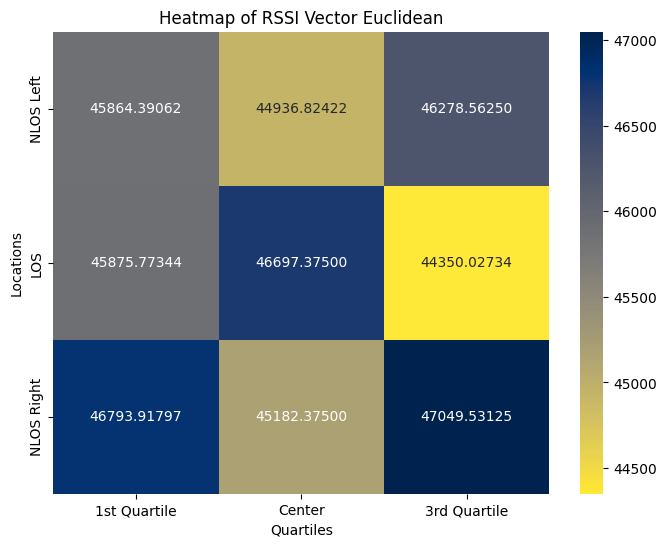

In [30]:
plot_HeatMapVector_RSSI14(RSSI_LOSCenter2_Cleaned)

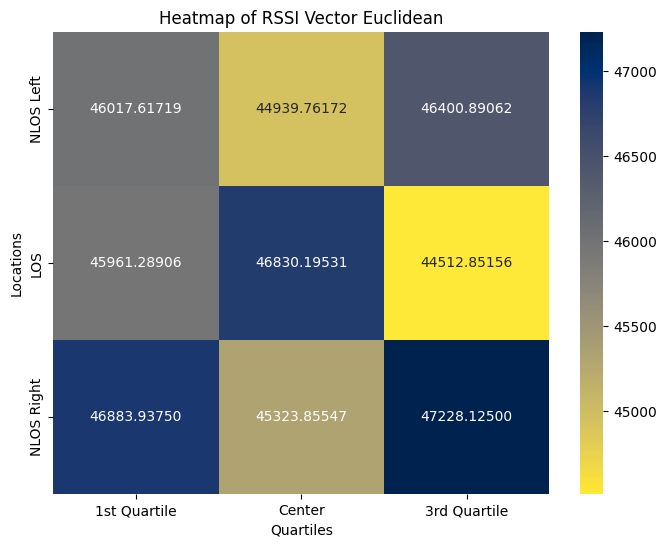

In [31]:
plot_HeatMapVector_RSSI14(RSSI_LOSFirstQuartile2_Cleaned)

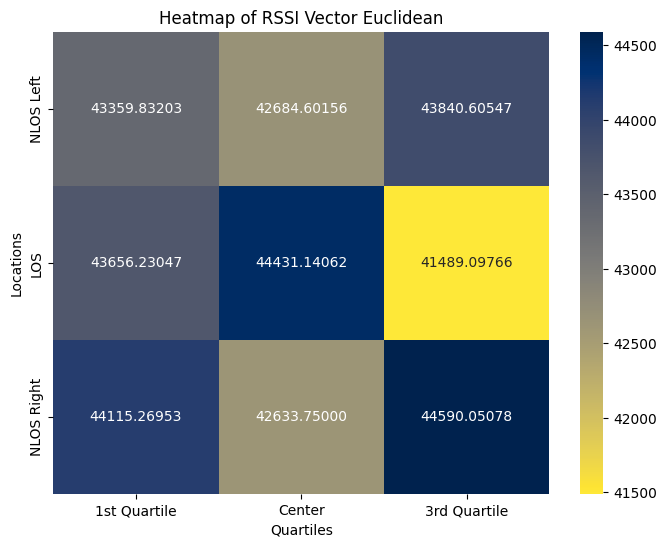

In [32]:
plot_HeatMapVector_RSSI14(RSSI_LOSThirdQuartile2_Cleaned)

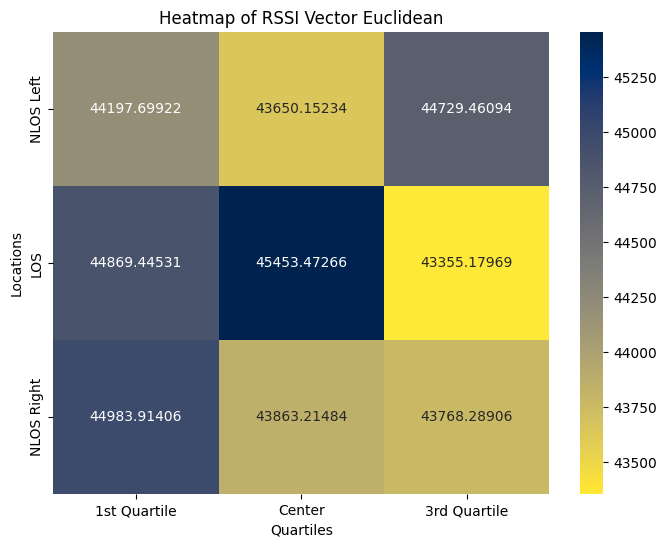

In [33]:
plot_HeatMapVector_RSSI14(RSSI_NLOSLeftCenter2_Cleaned)

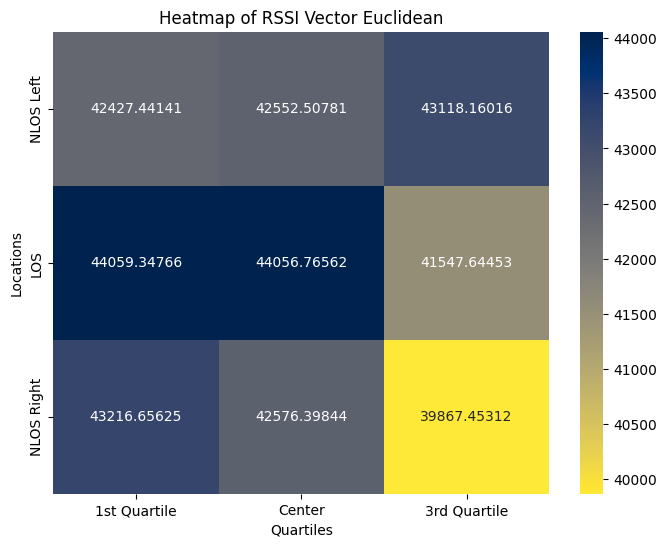

In [34]:
plot_HeatMapVector_RSSI14(RSSI_NLOSLeftFirstQuartile2_Cleaned)

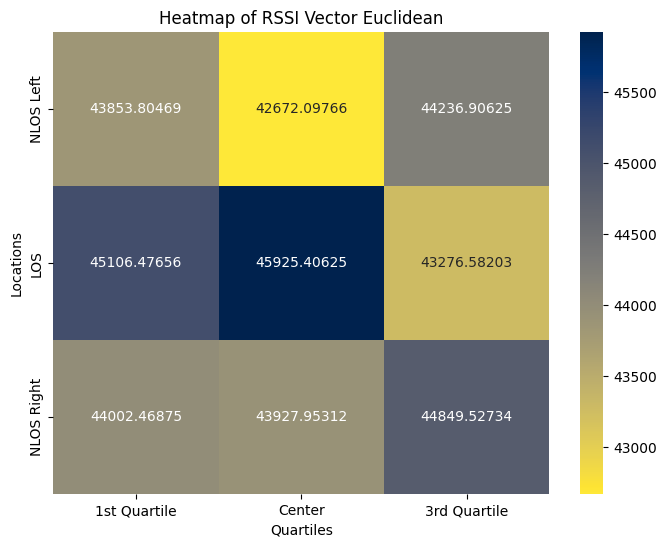

In [35]:
plot_HeatMapVector_RSSI14(RSSI_NLOSLeftThirdQuartile2_Cleaned)

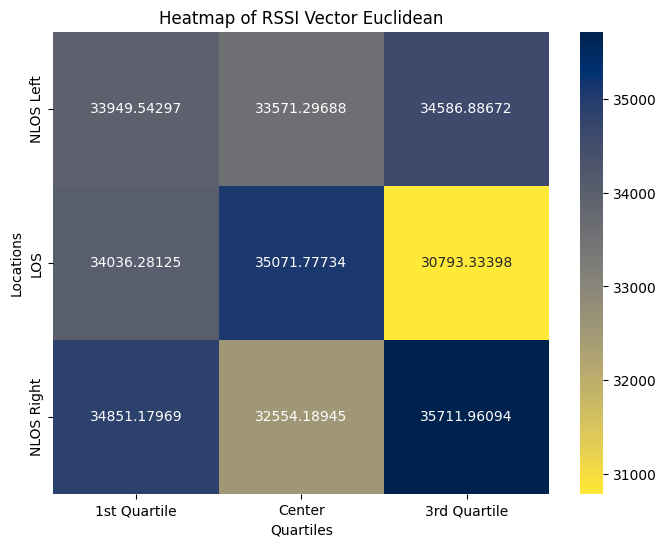

In [36]:
plot_HeatMapVector_RSSI14(RSSI_NLOSRightCenter2_Cleaned)

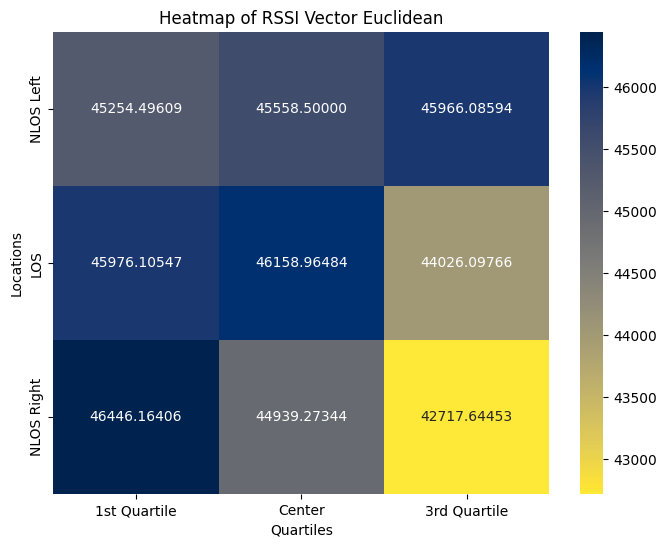

In [37]:
plot_HeatMapVector_RSSI14(RSSI_NLOSRightFirstQuartile2_Cleaned)

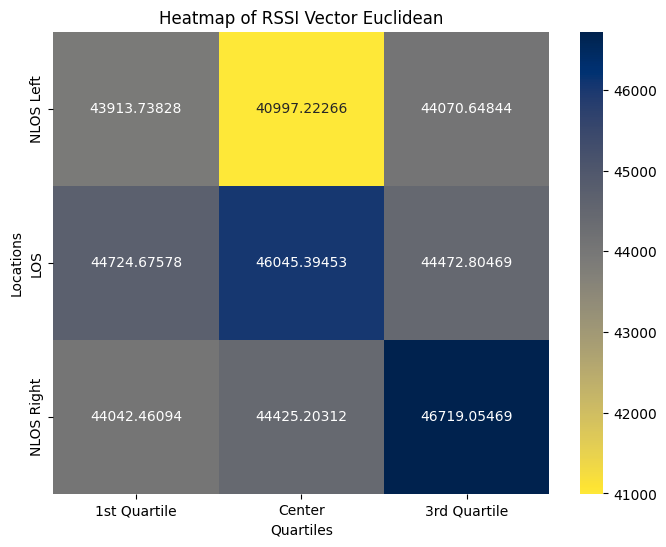

In [38]:
plot_HeatMapVector_RSSI14(RSSI_NLOSRightThirdQuartile2_Cleaned)

#### Heat Map for RSSI Vector Cleaned Mean Array 1, 2, 4(2)

In [ ]:
def plot_HeatMapVector_RSSI(data_array):
    Result_Array = np.array([
         [
            distance.euclidean(RSSI_NLOSLeftFirstQuartile_Mean_Array, data_array),
            distance.euclidean(RSSI_NLOSLeftCenter_Mean_Array, data_array),
            distance.euclidean(RSSI_NLOSLeftThirdQuartile_Mean_Array, data_array),
        ],
        [
            distance.euclidean(RSSI_LOSFirstQuartile_Mean_Array, data_array),
            distance.euclidean(RSSI_LOSCenter_Mean_Array, data_array),
            distance.euclidean(RSSI_LOSThirdQuartile_Mean_Array, data_array),
        ],
        [
            distance.euclidean(RSSI_NLOSRightFirstQuartile_Mean_Array, data_array),
            distance.euclidean(RSSI_NLOSRightCenter_Mean_Array, data_array),
            distance.euclidean(RSSI_NLOSRightThirdQuartile_Mean_Array, data_array),
        ],
    ])

    # Create a heatmap with reversed colormap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        Result_Array, 
        annot=True, 
        cmap="cividis_r",  # Reversed colormap for yellow closer to 0
        fmt=".5f",
        xticklabels=["1st Quartile", "Center", "3rd Quartile"],
        yticklabels=["NLOS Left", "LOS", "NLOS Right"]
    )
    plt.title("Heatmap of Statistical Vector Eucleidian")
    plt.xlabel("Quartiles")
    plt.ylabel("Locations")
    plt.show()

In [ ]:
plot_HeatMapVector_RSSI(RSSI_LOSCenter2_Cleaned)

In [ ]:
plot_HeatMapVector_RSSI(RSSI_LOSFirstQuartile2_Cleaned)

In [ ]:
plot_HeatMapVector_RSSI(RSSI_LOSThirdQuartile2_Cleaned)

In [ ]:
plot_HeatMapVector_RSSI(RSSI_NLOSLeftCenter2_Cleaned)

In [ ]:
plot_HeatMapVector_RSSI(RSSI_NLOSLeftFirstQuartile2_Cleaned)

In [ ]:
plot_HeatMapVector_RSSI(RSSI_NLOSLeftThirdQuartile2_Cleaned)

In [ ]:
plot_HeatMapVector_RSSI(RSSI_NLOSRightCenter2_Cleaned)

In [ ]:
plot_HeatMapVector_RSSI(RSSI_NLOSRightFirstQuartile2_Cleaned)

In [ ]:
plot_HeatMapVector_RSSI(RSSI_NLOSRightThirdQuartile2_Cleaned)

#### RSSI Vector from Mean Vector - Removed Section

In [ ]:
NLOSLeftFirstQuartile_RSSI = calculate_rssi(NLOSLeftFirstQuartile_Cleaned_Mean_Array)

In [ ]:
NLOSLeftThirdQuartile_RSSI = calculate_rssi(NLOSLeftThirdQuartile_Cleaned_Mean_Array)

In [ ]:
NLOSLeftCenter_RSSI = calculate_rssi(NLOSLeftCenter_Cleaned_Mean_Array)

In [ ]:
NLOSRightFirstQuartile_RSSI = calculate_rssi(NLOSRightFirstQuartile_Cleaned_Mean_Array)

In [ ]:
NLOSRightThirdQuartile_RSSI = calculate_rssi(NLOSRightThirdQuartile_Cleaned_Mean_Array)

In [ ]:
NLOSRightCenter_RSSI = calculate_rssi(NLOSRightCenter_Cleaned_Mean_Array)

In [ ]:
LOSFirstQuartile_RSSI = calculate_rssi(LOSFirstQuartile_Cleaned_Mean_Array)

In [ ]:
LOSThirdQuartile_RSSI = calculate_rssi(LOSThirdQuartile_Cleaned_Mean_Array)

In [ ]:
LOSCenter_RSSI = calculate_rssi(LOSCenter_Cleaned_Mean_Array)

In [ ]:
LOSFirstQuartile2_Cleaned_RSSI = calculate_rssi(LOSFirstQuartile2_Cleaned)
LOSCenter2_Cleaned_RSSI = calculate_rssi(LOSCenter2_Cleaned)

NLOSLeftFirstQuartile2_Cleaned_RSSI = calculate_rssi(NLOSLeftFirstQuartile2_Cleaned)
NLOSLeftCenter2_Cleaned_RSSI = calculate_rssi(NLOSLeftCenter2_Cleaned)
NLOSLeftThirdQuartile2_Cleaned_RSSI = calculate_rssi(NLOSLeftThirdQuartile2_Cleaned)
LOSThirdQuartile2_Cleaned_RSSI = calculate_rssi(LOSThirdQuartile2_Cleaned)
NLOSRightFirstQuartile2_Cleaned_RSSI = calculate_rssi(NLOSRightFirstQuartile2_Cleaned)
NLOSRightCenter2_Cleaned_RSSI = calculate_rssi(NLOSRightCenter2_Cleaned)
NLOSRightThirdQuartile2_Cleaned_RSSI = calculate_rssi(NLOSRightThirdQuartile2_Cleaned)

In [ ]:
def plot_HeatMapVector_RSSI2(data_array):
    Result_Array = np.array([
         [
            distance.euclidean(NLOSLeftFirstQuartile_RSSI, data_array),
            distance.euclidean(NLOSLeftCenter_RSSI, data_array),
            distance.euclidean(NLOSLeftThirdQuartile_RSSI, data_array),
        ],
        [
            distance.euclidean(LOSFirstQuartile_RSSI, data_array),
            distance.euclidean(LOSCenter_RSSI, data_array),
            distance.euclidean(LOSThirdQuartile_RSSI, data_array),
        ],
        [
            distance.euclidean(NLOSRightFirstQuartile_RSSI, data_array),
            distance.euclidean(NLOSRightCenter_RSSI, data_array),
            distance.euclidean(NLOSRightThirdQuartile_RSSI, data_array),
        ],
    ])

    # Create a heatmap with reversed colormap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        Result_Array, 
        annot=True, 
        cmap="cividis_r",  # Reversed colormap for yellow closer to 0
        fmt=".5f",
        xticklabels=["1st Quartile", "Center", "3rd Quartile"],
        yticklabels=["NLOS Left", "LOS", "NLOS Right"]
    )
    plt.title("Heatmap of Statistical Vector Eucleidian")
    plt.xlabel("Quartiles")
    plt.ylabel("Locations")
    plt.show()

In [ ]:
plot_HeatMapVector_RSSI2(LOSCenter2_Cleaned_RSSI)

In [ ]:
plot_HeatMapVector_RSSI2(LOSFirstQuartile2_Cleaned_RSSI)

In [ ]:
plot_HeatMapVector_RSSI2(LOSThirdQuartile2_Cleaned_RSSI)

In [ ]:
plot_HeatMapVector_RSSI2(NLOSLeftFirstQuartile2_Cleaned_RSSI)

In [ ]:
plot_HeatMapVector_RSSI2(NLOSLeftThirdQuartile2_Cleaned_RSSI)

In [ ]:
plot_HeatMapVector_RSSI2(NLOSLeftCenter2_Cleaned_RSSI)

In [ ]:
plot_HeatMapVector_RSSI2(NLOSRightFirstQuartile2_Cleaned_RSSI)

In [ ]:
plot_HeatMapVector_RSSI2(NLOSRightThirdQuartile2_Cleaned_RSSI)

In [ ]:
plot_HeatMapVector_RSSI2(NLOSRightCenter2_Cleaned_RSSI)

### Heat map layered

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt

cmap_name = 'yellow_to_blue'
n_bins = 100
colors = [(1, 1, 0), (0, 0, 1)]
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the first heatmap with full opacity (alpha = 1)
ax.imshow(Amplitude_Vector_Eucleidian_LOSFirstQuartile, cmap='YlGnBu', interpolation='nearest', alpha=0.9)

# Plot the second heatmap with reduced opacity (alpha = 0.7)
ax.imshow(Phase_Vector_Euclidean_LOSFirstQuartile, cmap='YlGnBu', interpolation='nearest', alpha=0.7)
ax.imshow(Phase_Vector_Euclidean_LOSFirstQuartile, cmap='YlGnBu', interpolation='nearest', alpha=0.5)
# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Define the 3x3 grid positions
x = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

# Given vector values for each position
values = np.array([0.8, 0.6, 0.7, 0.9, 0.5, 0.3, 0.4, 0.2, 0.1])

# Generate Euclidean distances from the center (1,1)
center = np.array([1, 1])
distances = np.linalg.norm(np.column_stack((x, y)) - center, axis=1)

# Create a fine grid for interpolation
grid_x, grid_y = np.mgrid[0:2.5:50j, 0:2.5:50j]

# Interpolate both datasets
grid_values = griddata((x, y), values, (grid_x, grid_y), method='cubic')
grid_distances = griddata((x, y), distances, (grid_x, grid_y), method='cubic')

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# First plot: Original values heatmap
im1 = axes[0].imshow(grid_values.T, extent=(0, 2.5, 0, 2.5), origin='lower', cmap='viridis')
fig.colorbar(im1, ax=axes[0])
axes[0].set_title("Original Values")

# Second plot: Euclidean distance heatmap
im2 = axes[1].imshow(grid_distances.T, extent=(0, 2.5, 0, 2.5), origin='lower', cmap='viridis')
fig.colorbar(im2, ax=axes[1])
axes[1].set_title("Euclidean Distance")

plt.show()


### Evaluation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create data
x = ["LOSCenter","LOSFirst","LOSThird","NLOSLeftCenter","NLOSLeftFirst","NLOSLeftThird","NLOSRightCenter","NLOSRightFirst","NLOSRightThird"]
amplitude = [4,4,4,0,8,5,5,0,0]
rssi = [4,4,4,0,5,5,8,0,0]
phase = [4,4,4,8,8,5,4,8,0]

# plot lines
plt.plot(x, amplitude, label = "Amplitude", linestyle="-")
plt.plot(x, rssi, label = "RSSI", linestyle="--")
plt.plot(x, phase, label = "Phase", linestyle=":")
plt.xlabel("Positions")
plt.ylabel("localization error(m)")
plt.xticks(range(len(x)), x, rotation='vertical')
# plt.plot(y, x, label = "line 2", linestyle="--")
# plt.plot(x, np.sin(x), label = "curve 1", linestyle="-.")
# plt.plot(x, np.cos(x), label = "curve 2", linestyle=":")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Data
vectors = ['Phase', 'Amplitude', 'RSSI', 'Statistics']
accuracy = [11.11, 100, 33.33, 0]

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(vectors, accuracy, color=['skyblue', 'green', 'orange', 'red'])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 2, f'{yval}%', ha='center', va='bottom')

# Customize chart
plt.ylim(0, 110)
plt.ylabel('Accuracy (%)')
plt.xlabel('Vectors')
plt.title('Accuracy by Vector Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# X-axis positions
positions = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Y-axis distances
phase = [8, 8, 5, 4, 4, 4, 8, 6.4, 0]
rssi = [5, 0, 5, 4, 4, 4, 0, 8, 0]
amplitude = [0, 0, 0, 0, 0, 0, 0, 0, 0]

# Create line chart
plt.figure(figsize=(10, 6))
plt.plot(positions, phase, marker='o', label='Phase', color='blue')
plt.plot(positions, rssi, marker='s', label='RSSI', color='orange')
plt.plot(positions, amplitude, marker='^', label='Amplitude', color='green')

# Labels and title
plt.xlabel('Voxels')
plt.ylabel('Distance')
plt.title('Distance between Actual vs Detected Location')
plt.xticks(positions)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


### Other

In [6]:
def calculate_rssi2(iq_data):
    """
    Calculate RSSI from IQ data.
    :param iq_data: numpy array of complex IQ samples
    :return: numpy array of RSSI values
    """
    power = np.abs(iq_data) ** 2
    rssi = 10 * np.log10(power + 1e-12)  # small epsilon to avoid log(0)
    return rssi

In [7]:
iq_data_list = [
    dataWithInterferenceLOSCenter,
    dataWithInterferenceLOSFirstQuartile,
    dataWithInterferenceLOSThirdQuartile,
    dataWithInterferenceNLOSLeftCenter,
   dataWithInterferenceNLOSLeftFirstQuartile,
   dataWithInterferenceNLOSLeftThirdQuartile,
   dataWithInterferenceNLOSRightCenter,
   dataWithInterferenceNLOSRightFirstQuartile,
   dataWithInterferenceNLOSRightThirdQuartile 
]
avg_rssi_per_position = [np.mean(calculate_rssi2(iq_data)) for iq_data in iq_data_list]

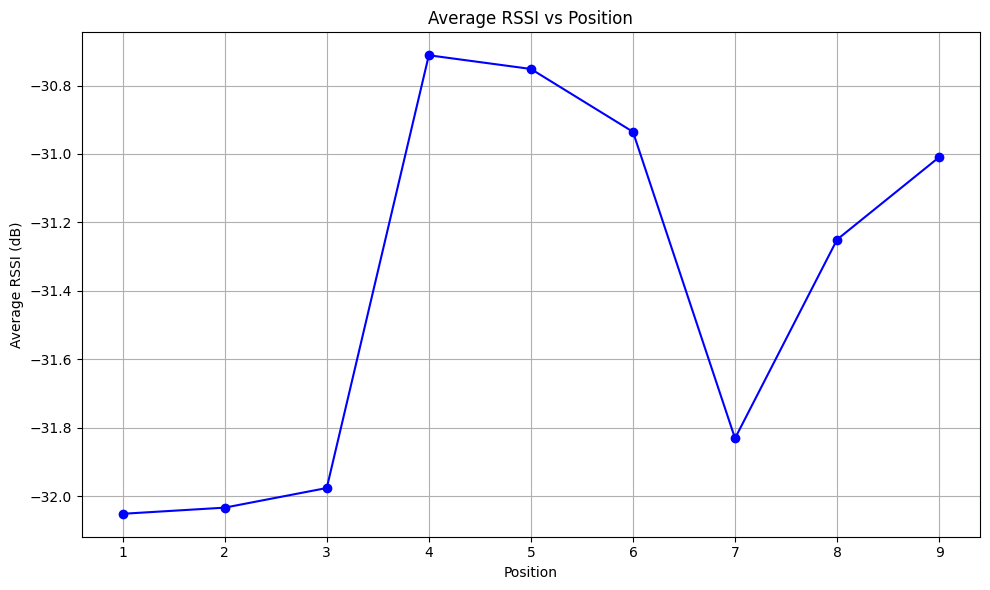

In [8]:
positions = list(range(1, 10))
plt.figure(figsize=(10, 6))
plt.plot(positions, avg_rssi_per_position, marker='o', linestyle='-', color='b')
plt.title('Average RSSI vs Position')
plt.xlabel('Position')
plt.ylabel('Average RSSI (dB)')
plt.grid(True)
plt.xticks(positions)
plt.tight_layout()
plt.show()